# Figures for GW190521 publications

This notebook generates (almost) all the Figures in the publications   
__GW190521: A Binary Black Hole Merger with a Total Mass of 150 Msun__ avaliable
through [PRL](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.125.101102), [arXiv](https://arxiv.org/abs/2009.01075), and [LIGO-P2000020](https://dcc.ligo.org/LIGO-P2000020/public).  
__Properties and astrophysical implications of the 150 Msun binary black hole merger GW190521__ avaliable
through [ApjL](https://iopscience.iop.org/article/10.3847/2041-8213/aba493), [arXiv](https://arxiv.org/abs/2009.01190), and [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public).

The data used in this notebook must be downloaded from the public LIGO DCC page [LIGO-P2000158](https://dcc.ligo.org/P2000158/public).

Figures 2,3,4,5 in [LIGO-P2000020](https://dcc.ligo.org/LIGO-P2000020/public) display the parameter estimation results using only the preferred waveform model (NRSur PHM) while the corresponding figures 1,2,6,9 in [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public) also display results from two other waveform models (Phenom PHM and SEOBNR PHM). This notebook generates the figures in [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public).

Figure 1 from [LIGO-P2000020](https://dcc.ligo.org/LIGO-P2000020/public) is produced with a separate notebook, GW190521_discovery_Fig1.ipynb, also available from [LIGO-P2000158](https://dcc.ligo.org/P2000158/public).

Figures 11 and 12 from [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public) are produced with a separate notebook, GW190521_Hierarchical_plots.ipynb, also available from [LIGO-P2000158](https://dcc.ligo.org/P2000158/public).


# Data release for GW190521
In public DCC page [LIGO-P2000158](https://dcc.ligo.org/P2000158/public), you will find several data files:
* `GW190521_posterior_samples.h5` - contains parameter estimation (PE) samples from many different runs:
  * NRSur7dq4 is our "preferred" waveform model (referred to as NRSur PHM in the papers). These samples contain the info for Table 1 and Figures 2, 3, 4, 5 of [LIGO-P2000020](https://dcc.ligo.org/LIGO-P2000020/public).
  * IMRPhenomPv3HM and SEOBNRv4PHM are alternative waveform models for comparison. Those samples, along with those from NRSur7dq4, contain the info for Table 1 and Figures 1, 2, 3, 4, 5, 6, 8, 9 of [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public).
* `GW190521_studies_posterior_samples.h5` - contains parameter estimation (PE) samples from runs used for specialized studies; these should not be used in preference to the previous runs for most applications.
  * The three sets of PE samples for NRSur7dq4_Lmax2, Lmax3, and Lmax4 are used for Figure 7 of [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public). 
  * The set of PE samples directly using NR is used for Figure 8 of [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public), and nowhere else in either paper. It has `luminosity_distance` set to 1 Mpc and redshift close to 0 for all samples, and hence all masses labeled `_source` are not actually corrected for redshift. The radiated energy also does not have the redshift correction. The remnant BH properties and peak luminosity are not computed using spin evolution and are thus slightly less accurate than for other runs.
  * The set of PE samples for NRSur7dq4_nospin and NRSur7dq4_spinaligned are used for computing Bayes Factors for spin and for higher multipoles, and for the hierarchical analysis described in Section 5.2.1 and Figures 11 and 12 of [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public). 
* `GW190521_Ringdown_samples.tgz` is a tarball containing nine more h5 files with posterior samples for the ringdown analysis described in Section 3.2 and Figure 9 of [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public).
* `GW190521_Implications_figure_data.tgz` is a tarball containing additional data needed to make Figures 5, 10, 11, 12, and 13 in [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public), including skymaps fits files.
* `GW190521_discovery_Fig1.tgz` is a tarball containing additional data needed to make Figure 1 in [LIGO-P2000020](https://dcc.ligo.org/LIGO-P2000020/public).
* `GW190521_discovery_figs_pdf.tgz` - tarball containing all the figures from the GW190521 discovery paper [LIGO-P2000020](https://dcc.ligo.org/LIGO-P2000020/public), in pdf.
* `GW190521_Implications_Figures_pdf.tgz` - tarball containing all the figures in the GW190521 implications paper [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public), in pdf.
* `GW190521_md5sums.txt` - containing md5sums for each of the h5 files.

In [1]:
# download the data used in this notebook by un-commenting out these shell commands (keep the !),
# or excecuting the commands in a shell, in the same directory as this notebook.

#!curl https://dcc.ligo.org/public/0168/P2000158/004/GW190521_posterior_samples.h5 -O
#!curl https://dcc.ligo.org/public/0168/P2000158/004/GW190521_studies_posterior_samples.h5 -O
#!curl https://dcc.ligo.org/public/0168/P2000158/004/GW190521_Ringdown_samples.tar -O
#!tar xvzf Ringdown_samples_GW190521.tgz
#!curl https://dcc.ligo.org/public/0168/P2000158/004/GW190521_Implications_figure_data.tar -O
#!tar xvzf GW190521_Implications_figure_data.tgz
#!curl https://dcc.ligo.org/public/0168/P2000158/004/GW190521_md5sums.txt -O

In [2]:
# generic python imports
from __future__ import division
import numpy as np
from IPython.display import HTML, display

import scipy
from scipy.special import erf
from scipy.stats import gaussian_kde
from scipy import integrate

import os,sys,subprocess
import h5py 
import hashlib  
import corner

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.lines import Line2D as ld

# figure fonts
matplotlib.rc('text', usetex=True)  
matplotlib.rcParams['text.latex.preamble'] = [r"\usepackage{bm}"]
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# LIGO-specific software; install with conda or pip
import lal                                          # https://pypi.org/project/lalsuite/
from pesummary.gw.file.read import read as GWread   # https://pypi.org/project/pesummary/
from ligo.skymap.io import fits                     # https://pypi.org/project/ligo.skymap/

In [3]:
# put figures in a sub-directory:
figpath = 'GW190521_Implications_Figures_pdf/' 
if not os.path.exists(figpath):
    os.makedirs(figpath)


In [4]:
#===============
# PE SAMPLES 
#===============

# read in PE sample files, check md5sum against https://dcc.ligo.org/public/0166/P2000158/002/GW190521_md5sums.txt

#------------------------------------
# a. Inspiral-Merger-Ringdown waveform model Posterior PE samples
#------------------------------------

posterior_samples_file='GW190521_posterior_samples.h5'
print("md5sum",posterior_samples_file,"=",hashlib.md5(open(posterior_samples_file,'rb').read()).hexdigest())
samples_file = h5py.File(posterior_samples_file,'r')

nrsur = samples_file['NRSur7dq4']['posterior_samples']
phenom = samples_file['IMRPhenomPv3HM']['posterior_samples']
seob = samples_file['SEOBNRv4PHM']['posterior_samples']

prior = samples_file['NRSur7dq4']['priors']['samples']
 

md5sum GW190521_posterior_samples.h5 = 8af9bce0b55b5ebed7853dbfaa69a2d5


In [5]:
#------------------------------------
# b. Higher-Mode Analysis - NRSur7dq4 runs with RIFT Pipeline
#------------------------------------

###HM_samples_fn = '/home/charlie.hoy/public_html/public_release/S190521g/v2/NRSur7dq4_restrictL/samples/posterior_samples.h5'
###HM_samples_fn = 'NRSur7dq4_restrictL_posterior_samples.h5'
HM_samples_fn = 'GW190521_studies_posterior_samples.h5'
print("md5sum",HM_samples_fn,"=",hashlib.md5(open(os.path.join('./',HM_samples_fn),'rb').read()).hexdigest())
HM_samples_file = h5py.File(HM_samples_fn,'r')

#l=2
nrs_l2 = HM_samples_file['NRSur7dq4_Lmax2']['posterior_samples']

#l=2:3
nrs_l3 = HM_samples_file['NRSur7dq4_Lmax3']['posterior_samples']

#l=2:4
nrs_l4 = HM_samples_file['NRSur7dq4_Lmax4']['posterior_samples']

md5sum GW190521_studies_posterior_samples.h5 = 880c79fbfc4058e9dd8a2bbf5841c691


In [6]:
#------------------------------------
# c. Numerical Relativity Runs from RIFT Pipeline
#------------------------------------

###NR_samples_fn = '/home/charlie.hoy/public_html/public_release/S190521g/v1/NR/samples/posterior_samples.h5'
###NR_samples_fn = 'GW190521_NR_posterior_samples.h5'
NR_samples_fn = 'GW190521_studies_posterior_samples.h5'
print("md5sum",NR_samples_fn,"=",hashlib.md5(open(os.path.join('./',NR_samples_fn),'rb').read()).hexdigest())
NR_samples_file = h5py.File(NR_samples_fn,'r')
nr_sim = NR_samples_file['NR']['posterior_samples']

md5sum GW190521_studies_posterior_samples.h5 = 880c79fbfc4058e9dd8a2bbf5841c691


In [7]:
#------------------------------------
# d. Ringdown Runs from pyRing Pipeline
#------------------------------------
# Copied tarball from https://dcc.ligo.org/public/0166/P2000158/002/GW190521_Ringdown_samples.tar
# check the md5sums against https://dcc.ligo.org/public/0166/P2000158/002/GW190521_md5sums.txt

ringdown_samples_dir = 'GW190521_Ringdown_samples/'

fnh5 = 'GW190521A_PROD0_DS_1mode_5M_pesummary_metafile.h5'
print("md5sum",fnh5,"=",hashlib.md5(open(os.path.join(ringdown_samples_dir,fnh5),'rb').read()).hexdigest())
damped_sinusoid_5M   = GWread(os.path.join(ringdown_samples_dir,fnh5))
Damped_sinusoid_5M   = damped_sinusoid_5M.samples_dict['GW190521A_PROD0_DS_1mode_5M']

fnh5 = 'GW190521A_PROD0_DS_1mode_10M_pesummary_metafile.h5'
print("md5sum",fnh5,"=",hashlib.md5(open(os.path.join(ringdown_samples_dir,fnh5),'rb').read()).hexdigest())
damped_sinusoid_10M   = GWread(os.path.join(ringdown_samples_dir,fnh5))
Damped_sinusoid_10M   = damped_sinusoid_10M.samples_dict['GW190521A_PROD0_DS_1mode_10M']

fnh5 = 'GW190521A_PROD0_DS_1mode_15M_pesummary_metafile.h5'
print("md5sum",fnh5,"=",hashlib.md5(open(os.path.join(ringdown_samples_dir,fnh5),'rb').read()).hexdigest())
damped_sinusoid_15M   = GWread(os.path.join(ringdown_samples_dir,fnh5))
Damped_sinusoid_15M   = damped_sinusoid_15M.samples_dict['GW190521A_PROD0_DS_1mode_15M']

fnh5 = 'GW190521A_PROD0_Kerr_220_10M_pesummary_metafile.h5'
print("md5sum",fnh5,"=",hashlib.md5(open(os.path.join(ringdown_samples_dir,fnh5),'rb').read()).hexdigest())
kerr_220   = GWread(os.path.join(ringdown_samples_dir,fnh5))
Kerr_220   = kerr_220.samples_dict['GW190521A_PROD0_Kerr_220_10M']

fnh5 = 'GW190521A_PROD0_Kerr_222_0M_pesummary_metafile.h5'
print("md5sum",fnh5,"=",hashlib.md5(open(os.path.join(ringdown_samples_dir,fnh5),'rb').read()).hexdigest())
kerr_222   = GWread(os.path.join(ringdown_samples_dir,fnh5))
Kerr_222   = kerr_222.samples_dict['GW190521A_PROD0_Kerr_222_0M']

fnh5 = 'GW190521A_PROD0_MMRDNP_10M_pesummary_metafile.h5'
print("md5sum",fnh5,"=",hashlib.md5(open(os.path.join(ringdown_samples_dir,fnh5),'rb').read()).hexdigest())
kerr_HM   = GWread(os.path.join(ringdown_samples_dir,fnh5))
Kerr_HM   = kerr_HM.samples_dict['GW190521A_PROD0_MMRDNP_10M']

fnh5 = 'GW190521A_NRSur7dq4_ftau_220_posterior_samples.h5'
print("md5sum",fnh5,"=",hashlib.md5(open(os.path.join(ringdown_samples_dir,fnh5),'rb').read()).hexdigest())
nrsur_ftau   = GWread(os.path.join(ringdown_samples_dir,fnh5))
nrsur_ftau   = nrsur_ftau.samples_dict['NRSur7dq4']

fnh5 = 'GW190521A_SEOBNRv4PHM_ftau_220_posterior_samples.h5'
print("md5sum",fnh5,"=",hashlib.md5(open(os.path.join(ringdown_samples_dir,fnh5),'rb').read()).hexdigest())
seob_ftau   = GWread(os.path.join(ringdown_samples_dir,fnh5))
seob_ftau   = seob_ftau.samples_dict['SEOBNRv4PHM']

fnh5 = 'GW190521A_IMRPhenomPv3HM_ftau_220_posterior_samples.h5'
print("md5sum",fnh5,"=",hashlib.md5(open(os.path.join(ringdown_samples_dir,fnh5),'rb').read()).hexdigest())
phenom_ftau   = GWread(os.path.join(ringdown_samples_dir,fnh5))
phenom_ftau   = phenom_ftau.samples_dict['IMRPhenomPv3HM']


md5sum GW190521A_PROD0_DS_1mode_5M_pesummary_metafile.h5 = c971e21f2bc317cba5a6a02e3829f8d1
md5sum GW190521A_PROD0_DS_1mode_10M_pesummary_metafile.h5 = 6ef505c83a1f6304c822defe63485d65
md5sum GW190521A_PROD0_DS_1mode_15M_pesummary_metafile.h5 = 70f55c2d74990f0602cc8aa6a49d961d
md5sum GW190521A_PROD0_Kerr_220_10M_pesummary_metafile.h5 = 28d380a482c824d244c331e66ea8efbf
md5sum GW190521A_PROD0_Kerr_222_0M_pesummary_metafile.h5 = 64dfaabbf133e887e9ce73be7c54f50d
md5sum GW190521A_PROD0_MMRDNP_10M_pesummary_metafile.h5 = b309aa330d1c72e7edcf4145ba9347f8
md5sum GW190521A_NRSur7dq4_ftau_220_posterior_samples.h5 = 3cd72b881b5ba462a3f9d525af8d2897
md5sum GW190521A_SEOBNRv4PHM_ftau_220_posterior_samples.h5 = d46d82dc245135c3b0cfb6698b2386fc
md5sum GW190521A_IMRPhenomPv3HM_ftau_220_posterior_samples.h5 = 20d7006063a869456564ab161e6ba609


In [8]:
#========================
# Bounded KDE function, used to smoothe 1-D posterior distributions.
#========================

class Bounded_kde(gaussian_kde):
    r"""Represents a one-dimensional Gaussian kernel density estimator
    for a probability distribution function that exists on a bounded
    domain."""

    def __init__(self, pts, low=None, high=None, *args, **kwargs):
        """Initialize with the given bounds.  Either ``low`` or
        ``high`` may be ``None`` if the bounds are one-sided.  Extra
        parameters are passed to :class:`gaussian_kde`.

        :param low: The lower domain boundary.

        :param high: The upper domain boundary."""
        pts = np.atleast_1d(pts)

        assert pts.ndim == 1, 'Bounded_kde can only be one-dimensional'
        
        super(Bounded_kde, self).__init__(pts, *args, **kwargs)

        self._low = low
        self._high = high

    @property
    def low(self):
        """The lower bound of the domain."""
        return self._low

    @property
    def high(self):
        """The upper bound of the domain."""
        return self._high

    def evaluate(self, xs):
        """Return an estimate of the density evaluated at the given
        points."""
        xs = np.atleast_1d(xs)
        assert xs.ndim == 1, 'points must be one-dimensional'

        pdf = super(Bounded_kde, self).evaluate(xs)

        if self.low is not None:
            pdf += super(Bounded_kde, self).evaluate(2.0*self.low - xs)

        if self.high is not None:
            pdf += super(Bounded_kde, self).evaluate(2.0*self.high - xs)

        return pdf

    __call__ = evaluate


In [9]:
#========================
# PLOTTING FUNCTIONS 
#========================

#-------------------------------------------
# a. Plot with 2D contour + x,y histogram
#-------------------------------------------
def triangle_plot_2d_axes(
    xbounds, ybounds, figsize=(8, 8),
    width_ratios=[4, 1], height_ratios=[1, 4], wspace=0.0, hspace=0.0,
    grid=False,high1d=1):
    """Initialize the axes for a 2d triangle plot.
    """
    high1d = high1d

    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(
        2, 2,
        width_ratios=width_ratios, height_ratios=height_ratios,
        wspace=wspace, hspace=hspace)

    ax1 = plt.subplot(gs[0])
    ax3 = plt.subplot(gs[2])
    ax4 = plt.subplot(gs[3])

    ax1.minorticks_on()
    ax3.minorticks_on()
    ax4.minorticks_on()

    if grid:
        ax1.grid(which='major', ls='-')
        ax1.grid(which='minor', ls=':')
        ax3.grid(which='major', ls='-')
        ax3.grid(which='minor', ls=':')
        ax4.grid(which='major', ls='-')
        ax4.grid(which='minor', ls=':')

    # Get rid of tick labels
    ax1.xaxis.set_ticklabels([])
    ax4.yaxis.set_ticklabels([])

    # Use consistent x-axis and y-axis bounds in all 3 plots
    ax1.set_ylim(0, high1d)
    ax1.set_xlim(xbounds[0], xbounds[1])
    ax3.set_xlim(xbounds[0], xbounds[1])
    ax3.set_ylim(ybounds[0], ybounds[1])
    ax4.set_xlim(0, high1d)
    ax4.set_ylim(ybounds[0], ybounds[1])

    return fig, ax1, ax3, ax4


def create_fig_and_axes(xbounds, ybounds, figsize=(9.7, 9.7),high1d=1):
    fig, ax1, ax3, ax4 = triangle_plot_2d_axes(
        xbounds, ybounds, figsize=figsize, width_ratios=[4, 1],
        height_ratios=[1, 4], wspace=0.0, hspace=0.0,high1d=high1d)
    return fig, ax1, ax3, ax4





#------------------------------------------------------------
# b. Plotting the main result: NRSur PHM (filled Contour)
#------------------------------------------------------------

def add_samples_to_fig(name, parameter_1,parameter_2,zorder=10,norm_factor_x=1,norm_factor_y=1,bounded_1=False,low_1=None,high_1=None,bounded_2=False,low_2=None,high_2=None):
    
    #name: name of pe result to plot
    #parameter 1 and parameter 2: parameters to plot in the 2D plot
    #zorder: if plottting multiple results, a larger zorder places the contour on top
    #norm_factor_x,y: parameter to scale the corner 1D histograms
    
    x = samples_dict[name][parameter_1]
    y = samples_dict[name][parameter_2]
    xlow, xhigh = xlims
    xsmooth = np.linspace(xlow, xhigh, 1000)
    ylow, yhigh = ylims
    ysmooth = np.linspace(ylow, yhigh, 1000)

    norm_factor_x=0.95*norm_factor_x
    norm_factor_y=0.95*norm_factor_y
    
    c = color_dict[name]
    label = label_dict[name]
    alpha = alpha_dict[name]
    lw = lw_dict[name]
    bb = bins_dict[name]    


    if bounded_1==True:                     
        if parameter_1 == 'chi_p':
            guess = lambda x: x * (1.-x)
            kde = gaussian_kde(x, weights=1./guess(x))
            guess_norm = integrate.quad(guess, low_1, high_1)[0]

            ax1.plot(xsmooth, norm_factor_x* kde(xsmooth) * guess(xsmooth) / guess_norm, color=c, lw=lw, label=label,
             zorder=zorder)
        
            ax1.fill_between(xsmooth, 0, norm_factor_x* kde(xsmooth) * guess(xsmooth) / guess_norm, color=c, alpha=alpha,
                     zorder=zorder)
            
        elif parameter_1 == 'theta_jn':
            guess = lambda x: x * (np.pi-x)
            kde = gaussian_kde(x, weights=1./guess(x))
            guess_norm = integrate.quad(guess, low_1, high_1)[0]

            ax1.plot(xsmooth, norm_factor_x* kde(xsmooth) * guess(xsmooth), color=c, lw=lw, label=label,
             zorder=zorder)
        
            ax1.fill_between(xsmooth, 0, norm_factor_x* kde(xsmooth) * guess(xsmooth), color=c, alpha=alpha,
                     zorder=zorder)
         
        else:       
            print("Using bounded KDE")   
            kde = Bounded_kde(x,low=low_1,high=high_1)
            ax1.plot(xsmooth, norm_factor_x*kde(xsmooth), color=c, lw=lw, label=label,
                     zorder=zorder)
            ax1.fill_between(xsmooth, 0, norm_factor_x*kde(xsmooth), color=c, alpha=alpha,
                             zorder=zorder)            
        
    else:         
        kde = gaussian_kde(x)

        ax1.plot(xsmooth, norm_factor_x*kde(xsmooth), color=c, lw=lw, label=label,
                 zorder=zorder)
        ax1.fill_between(xsmooth, 0, norm_factor_x*kde(xsmooth), color=c, alpha=alpha,
                         zorder=zorder)
    ax1.axvline(np.quantile(x, 0.05), color=c, ls='dashed')
    ax1.axvline(np.quantile(x, 0.95), color=c, ls='dashed')

    if bounded_2==True:        
        print("Using bounded KDE")    
        kde = Bounded_kde(y,low=low_2,high=high_2)    
    else:         
        kde = gaussian_kde(y)
        
    ax4.plot(norm_factor_y*kde(ysmooth), ysmooth, color=c, lw=lw, label=label,
             zorder=zorder)
    ax4.fill_betweenx(ysmooth, 0, norm_factor_y*kde(ysmooth), color=c, alpha=alpha,
                      zorder=zorder)
    ax4.axhline(np.quantile(y, 0.05), color=c, ls='dashed')
    ax4.axhline(np.quantile(y, 0.95), color=c, ls='dashed')
    

###### For the case of m1, m2 reflect samples at m1=m2 to correctly treat the boundary #######
    
    if parameter_1 == 'mass_1_source' and parameter_2 == 'mass_2_source':       
        print("Symmetrising samples around m1=m2")    
        # symmetrize the samples over 1<->2
        x_temp = np.concatenate((x, y))
        y_temp = np.concatenate((y, x))        
        x=x_temp
        y=y_temp    
    else:        
        print("No reflexion done")
    
    my_range = [[xlow, xhigh], [ylow, yhigh]]
    corner.hist2d(x, y, ax=ax3, range=my_range, color=c,
                  plot_datapoints=False, plot_density=True,smooth=True,
                  levels=[0.9],fill_contours=False,bins=bb, lw=4)

    
#----------------------------------------------------------------------------
# c. Plotting other models: Phenom PHM, SEOBNR PHM (transparent contours)
#-----------------------------------------------------------------------------

def add_samples_to_fig_nofilled(name, parameter_1,parameter_2,zorder=10,norm_factor_x=1,norm_factor_y=1,bounded_1=False,low_1=None,high_1=None,bounded_2=False,low_2=None,high_2=None):
    
    x = samples_dict[name][parameter_1]
    y = samples_dict[name][parameter_2]
    xlow, xhigh = xlims
    xsmooth = np.linspace(xlow, xhigh, 1000)
    ylow, yhigh = ylims
    ysmooth = np.linspace(ylow, yhigh, 1000)

    norm_factor_x=0.95*norm_factor_x
    norm_factor_y=0.95*norm_factor_y
    
    c = color_dict[name]
    label = label_dict[name]
    alpha = alpha_dict[name]
    lw = lw_dict[name]
    bb = bins_dict[name]

    if bounded_1==True:                     
        if parameter_1 == 'chi_p':
            guess = lambda x: x * (1.-x)
            kde = gaussian_kde(x, weights=1./guess(x))
            guess_norm = integrate.quad(guess, low_1, high_1)[0]

            ax1.plot(xsmooth, norm_factor_x* kde(xsmooth) * guess(xsmooth) / guess_norm, color=c, lw=lw, label=label,
             zorder=zorder)
            
        elif parameter_1 == 'theta_jn':
            guess = lambda x: x * (np.pi-x)
            kde = gaussian_kde(x, weights=1./guess(x))
            guess_norm = integrate.quad(guess, low_1, high_1)[0]

            ax1.plot(xsmooth, norm_factor_x* kde(xsmooth) * guess(xsmooth), color=c, lw=lw, label=label,
             zorder=zorder)
                  
        else:       
            print("Using bounded KDE")   
            kde = Bounded_kde(x,low=low_1,high=high_1)          
            ax1.plot(xsmooth, norm_factor_x*kde(xsmooth), color=c, lw=lw, label=label,
                     zorder=zorder)            
    else:         
        kde = gaussian_kde(x)    
    
        ax1.plot(xsmooth, norm_factor_x*kde(xsmooth), color=c, lw=lw, label=label,
                 zorder=zorder)
    ax1.axvline(np.quantile(x, 0.05), color=c, ls='dashed')
    ax1.axvline(np.quantile(x, 0.95), color=c, ls='dashed')

    
    if bounded_2==True:        
        print("Using bounded KDE")    
        kde = Bounded_kde(y,low=low_2,high=high_2)    
    else:         
        kde = gaussian_kde(y)    
    
    ax4.plot(norm_factor_y*kde(ysmooth), ysmooth, color=c, lw=lw, label=label,
             zorder=zorder)
    ax4.axhline(np.quantile(y, 0.05), color=c, ls='dashed')
    ax4.axhline(np.quantile(y, 0.95), color=c, ls='dashed')

###### For the case of m1, m2 reflect samples at m1=m2 to correctly treat the boundary #######
    
    if parameter_1 == 'mass_1_source' and parameter_2 == 'mass_2_source':       
        print("Symmetrising samples around m1=m2")    
        # symmetrize the samples over 1<->2
        x_temp = np.concatenate((x, y))
        y_temp = np.concatenate((y, x))        
        x=x_temp
        y=y_temp    
    else:        
        print("No reflexion done")
        
    my_range = [[xlow, xhigh], [ylow, yhigh]]
    corner.hist2d(x, y, ax=ax3, range=my_range, color=c,
                  plot_datapoints=False, plot_density=False,smooth=True,#levels=(np.exp(-0.5),np.exp(-1)),
                  levels=[0.9],no_fill_contour=False,bins=bb, lw=4,
                 )

    

#----------------------------------------------------------------------------
# e. Plotting prior (1D histograms)
#-----------------------------------------------------------------------------
       
    
def add_prior(name, parameter_1,parameter_2,zorder=10,norm_factor_x=1,norm_factor_y=1,bounded_1=False,low_1=None,high_1=None,bounded_2=False,low_2=None,high_2=None):
        
    x = samples_dict[name][parameter_1]
    y = samples_dict[name][parameter_2]
    
    xlow, xhigh = xlims
    xsmooth = np.linspace(xlow, xhigh, 10000)
    ylow, yhigh = ylims
    ysmooth = np.linspace(ylow, yhigh, 10000)

    norm_factor_x=0.95*norm_factor_x
    norm_factor_y=0.95*norm_factor_y
    
    #c = color_dict[name]
    label = 'Prior'
    alpha = 0.0
    lw = 3
    c='black'

    if bounded_1==True:        
        print("Using bounded KDE")    
        kde = Bounded_kde(x,low=low_1,high=high_1)    
    else:         
        kde = gaussian_kde(x)        
       
    ax1.plot(xsmooth, norm_factor_x*kde(xsmooth), color=c, lw=lw, label=label,
             zorder=zorder)
    ax1.fill_between(xsmooth, 0, norm_factor_x*kde(xsmooth), color=c, alpha=alpha,
                     zorder=zorder)

    if bounded_2==True:        
        print("Using bounded KDE")    
        kde = Bounded_kde(y,low=low_2,high=high_2)    
    else:         
        kde = gaussian_kde(y)    
    
    ax4.plot(norm_factor_y*kde(ysmooth), ysmooth, color='black', lw=lw, label=label,
             zorder=zorder)
    #ax4.axis('off')
    ax4.fill_betweenx(ysmooth, 0, norm_factor_y*kde(ysmooth), color=c, alpha=alpha,
                      zorder=zorder)

    my_range = [[xlow, xhigh], [ylow, yhigh]]
    

    
    
def add_prior_bounded(name, parameter_1,parameter_2,zorder=10,norm_factor_x=1,norm_factor_y=1,bounded_1=False,low_1=None,high_1=None,bounded_2=False,low_2=None,high_2=None):
    
    x = samples_dict[name][parameter_1][()]
    y = samples_dict[name][parameter_2][()]
    
    xlow, xhigh = xlims
    xsmooth = np.linspace(xlow, xhigh, 10000)
    ylow, yhigh = ylims
    ysmooth = np.linspace(ylow, yhigh, 10000)

    norm_factor_x=0.95*norm_factor_x
    norm_factor_y=0.95*norm_factor_y
    
    #c = color_dict[name]
    label = 'Prior'
    alpha = 0.3
    lw = 3
    ls = 'solid'
    kde = gaussian_kde(x)
    
    c='black'
    
    if bounded_1==True:                     
        if parameter_1 == 'chi_p':
            guess = lambda x: x * (1.-x)
            kde = gaussian_kde(x, weights=1./guess(x))
            guess_norm = integrate.quad(guess, low_1, high_1)[0]

            ax1.plot(xsmooth, norm_factor_x* kde(xsmooth) * guess(xsmooth) / guess_norm, color=c, lw=lw, label=label,
             zorder=zorder)
            
        elif parameter_1 == 'theta_jn':
            guess = lambda x: x * (np.pi-x)
            kde = gaussian_kde(x, weights=1./guess(x))
            guess_norm = integrate.quad(guess, low_1, high_1)[0]

            ax1.plot(xsmooth, norm_factor_x* kde(xsmooth) * guess(xsmooth), color=c, lw=lw, label=label,
             zorder=zorder)
                  
        else:       
            print("Using bounded KDE")   
            kde = Bounded_kde(x,low=low_1,high=high_1)          
            ax1.plot(xsmooth, norm_factor_x*kde(xsmooth), color=c, lw=lw, label=label,
                     zorder=zorder)            
    else:         
        kde = gaussian_kde(x)    
    
        ax1.plot(xsmooth, norm_factor_x*kde(xsmooth), color=c, lw=lw, label=label,
                 zorder=zorder)

    
    if bounded_2==True:        
        print("Using bounded KDE")    
        kde = Bounded_kde(y,low=low_2,high=high_2)    
    else:         
        kde = gaussian_kde(y)    
    
    ax4.plot(norm_factor_y*kde(ysmooth), ysmooth, color=c, lw=lw, label=label,
             zorder=zorder)

    
#----------------------------------------------------------------------------
# f. Plotting Ring Down modes: Phenom PHM, SEOBNR PHM (transparent contours)
#-----------------------------------------------------------------------------

def add_samples_to_fig_rd(name, parameter_1,parameter_2,zorder=10,norm_factor_x=1,norm_factor_y=1,bounded=False):
    
    x = samples_dict[name][parameter_1]
    y = samples_dict[name][parameter_2]
    xlow, xhigh = xlims
    xsmooth = np.linspace(xlow, xhigh, 1000)
    ylow, yhigh = ylims
    ysmooth = np.linspace(ylow, yhigh, 1000)

    norm_factor_x=0.95*norm_factor_x
    norm_factor_y=0.95*norm_factor_y
    
    c = color_dict[name]
    label = label_dict[name]
    alpha = alpha_dict[name]
    lw = lw_dict[name]
    #ls = ls_dict[name]
        
    kde = gaussian_kde(x)
    bb = bins_dict[name]   
    
    ax1.plot(xsmooth, norm_factor_x*kde(xsmooth), color=c, lw=lw, label=label,
             zorder=zorder)
    #ax1.axis('off')
    ax1.axvline(np.quantile(x, 0.05), color=c, ls='none')
    ax1.axvline(np.quantile(x, 0.95), color=c, ls='none')

    kde = gaussian_kde(y)
    
    ax4.plot(norm_factor_y*kde(ysmooth), ysmooth, color=c, lw=lw, label=label,
             zorder=zorder)

 #                     zorder=zorder)
    ax4.axhline(np.quantile(y, 0.05), color=c, ls='none')
    ax4.axhline(np.quantile(y, 0.95), color=c, ls='none')
    
    my_range = [[xlow, xhigh], [ylow, yhigh]]
    corner.hist2d(x, y, ax=ax3, range=my_range, color=c, ls='dashed',
                  plot_datapoints=False, plot_density=False,smooth=True,#levels=(np.exp(-0.5),np.exp(-1)),
                  levels=[0.9],no_fill_contour=False,bins=bb, lw=4, alpha=0.2
                 )
    

Symmetrising samples around m1=m2
Symmetrising samples around m1=m2
Symmetrising samples around m1=m2
Saving


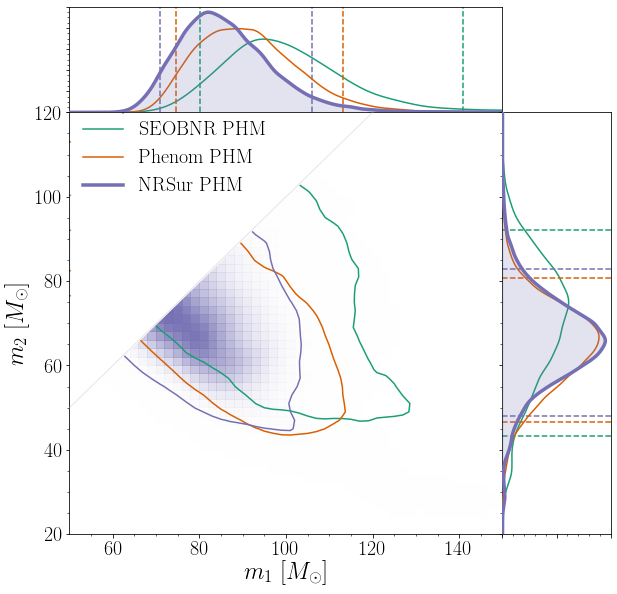

In [10]:
#========================
# Fig-1a: m1-m2 plot 
#========================

samples_dict = dict(IMR=phenom,NRS=nrsur,SEOB=seob)
for key in samples_dict:
    samples_dict[key] = samples_dict[key]

color_dict = dict(NRS="#7570b3", IMR="#d95f02", SEOB="#1b9e77")
label_dict = dict(NRS="NRSur PHM", IMR="Phenom PHM", SEOB="SEOBNR PHM")
alpha_dict = dict(NRS=0.2,IMR=0.2, SEOB=0.2)
lw_dict = dict(NRS=3.5, IMR=1.5, SEOB=1.5)
bins_dict = dict(NRS=50, IMR=50, SEOB=50)


parameter_1 = 'mass_1_source'
parameter_2 = 'mass_2_source'

xlims = [50, 150]
ylims = [20, 120]

norm_factor = 1.60


fig, ax1, ax3, ax4 = create_fig_and_axes(xlims, ylims)
ax3.set_xlabel(r"$m_1 \ [M_\odot]$",fontsize=24)
ax3.set_ylabel(r"$m_2 \ [M_\odot]$",fontsize=24)
ax3.tick_params(labelsize=10)

my_array_x=np.linspace(xlims[0],xlims[1],1000)
my_array_y=np.linspace(ylims[0],ylims[1],1000)

r1x=1/np.max(scipy.stats.gaussian_kde(nrsur[parameter_1])(my_array_x))
r2x=1/np.max(scipy.stats.gaussian_kde(phenom[parameter_1])(my_array_x))
r3x=1/np.max(scipy.stats.gaussian_kde(seob[parameter_1])(my_array_x))

r1y=1/np.max(scipy.stats.gaussian_kde(nrsur[parameter_2])(my_array_y))
r2y=1/np.max(scipy.stats.gaussian_kde(phenom[parameter_2])(my_array_y))
r3y=1/np.max(scipy.stats.gaussian_kde(seob[parameter_2])(my_array_y))

norm_factor_x = np.min([r1x,r2x,r3x])
norm_factor_y = np.min([r1y,r2y,r3y])

add_samples_to_fig_nofilled("SEOB",parameter_1,parameter_2,zorder=-10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)
add_samples_to_fig_nofilled("IMR",parameter_1,parameter_2, zorder=10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)
add_samples_to_fig("NRS",parameter_1,parameter_2,zorder=20,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)


ax3.set_xlim(*xlims)
ax1.set_yticklabels([],fontsize=10)
ax4.set_xticklabels([],fontsize=20)
ax3.fill_between(np.arange(50.3,119.7),np.arange(50.3,119.7),119.7,color='white',alpha=1,zorder=50)
#ax3.fill_between(np.arange(20,60),np.arange(20,60),60,color='white',alpha=1,zorder=100)

ax3.plot(np.arange(0,200),np.arange(0,200), 200, c='silver', lw=1, ls='-', alpha=0.4,zorder=100)

leg = ax3.legend(*ax4.get_legend_handles_labels(), loc=2, frameon=False, prop={'size': 20}, bbox_to_anchor=(-0.01, 1.02))
leg.set_zorder(100)
ax3.tick_params(axis='both', labelsize=20)


print("Saving")
fig.savefig(figpath+'m1m2_vf.pdf',format='pdf', transparent=True, bbox_inches='tight')


No reflexion done
No reflexion done
No reflexion done
Using bounded KDE
Saving


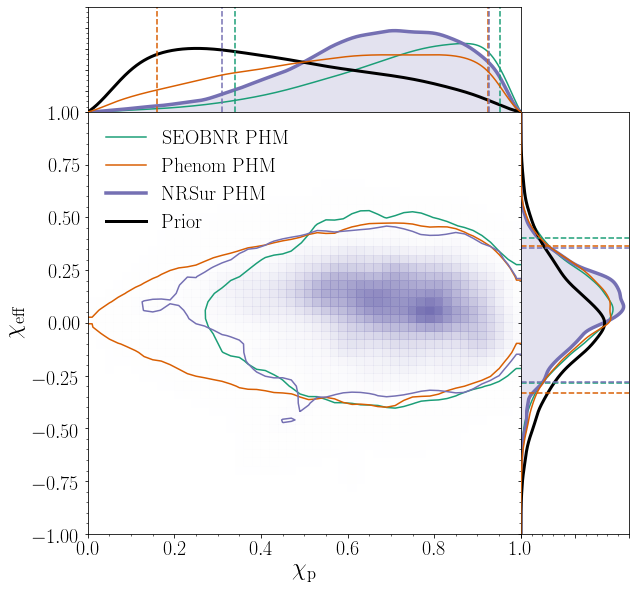

In [11]:
#========================
# Fig-1b: chi_p-chi_eff plot 
#=======================

samples_dict = dict(IMR=phenom,NRS=nrsur,SEOB=seob, PRIOR=prior)
for key in samples_dict:
    samples_dict[key] = samples_dict[key]

color_dict = dict(NRS="#7570b3", IMR="#d95f02", SEOB="#1b9e77")
label_dict = dict(NRS="NRSur PHM", IMR="Phenom PHM", SEOB="SEOBNR PHM", PRIOR="Prior")
alpha_dict = dict(NRS=0.2,IMR=0.2, SEOB=0.2)
lw_dict = dict(NRS=3.5, IMR=1.5, SEOB=1.5)
bins_dict = dict(NRS=50, IMR=50, SEOB=50)


parameter_1 = 'chi_p'
parameter_2 = 'chi_eff'


xlims = [0, 1]
ylims = [-1, 1]

norm_factor = 1.60

fig, ax1, ax3, ax4 = create_fig_and_axes(xlims, ylims)
ax3.set_xlabel(r"$\chi_\mathrm{p}$",fontsize=24)
ax3.set_ylabel(r"$\chi_\mathrm{eff}$",fontsize=24)
ax3.tick_params(labelsize=10)

my_array_x=np.linspace(xlims[0],xlims[1],1000)
my_array_y=np.linspace(ylims[0],ylims[1],1000)

r1x=1/np.max(scipy.stats.gaussian_kde(nrsur[parameter_1])(my_array_x))
r2x=1/np.max(scipy.stats.gaussian_kde(phenom[parameter_1])(my_array_x))
r3x=1/np.max(scipy.stats.gaussian_kde(seob[parameter_1])(my_array_x))
r4x=1/np.max(scipy.stats.gaussian_kde(prior[parameter_1])(my_array_x))

r1y=1/np.max(scipy.stats.gaussian_kde(nrsur[parameter_2])(my_array_y))
r2y=1/np.max(scipy.stats.gaussian_kde(phenom[parameter_2])(my_array_y))
r3y=1/np.max(scipy.stats.gaussian_kde(seob[parameter_2])(my_array_y))
r4y=1/np.max(scipy.stats.gaussian_kde(prior[parameter_2])(my_array_x))

norm_factor_x = np.min([r1x,r2x,r3x, r4x])
norm_factor_y = np.min([r1y,r2y,r3y, r4y])

add_samples_to_fig_nofilled("SEOB",parameter_1,parameter_2,zorder=-10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_1=True,low_1=0,high_1=1)
add_samples_to_fig_nofilled("IMR",parameter_1,parameter_2, zorder=10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_1=True,low_1=0,high_1=1)
add_samples_to_fig("NRS",parameter_1,parameter_2,zorder=-10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_1=True,low_1=0,high_1=1)
add_prior_bounded("PRIOR",parameter_1,parameter_2,zorder=-10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_1=True,low_1=0,high_1=1,bounded_2=True,low_2=-1,high_2=1)


ax3.set_xlim(*xlims)
ax1.set_yticklabels([],fontsize=10)
ax4.set_xticklabels([],fontsize=20)
ax3.legend(*ax4.get_legend_handles_labels(), loc=2, frameon=False,prop={'size': 20})
ax3.tick_params(axis='both', labelsize=20)

print("Saving")
fig.savefig(figpath+'chis_vf.pdf',format='pdf', transparent=True, bbox_inches='tight')

Using bounded KDE
No reflexion done
Using bounded KDE
No reflexion done
Using bounded KDE
No reflexion done
Saving


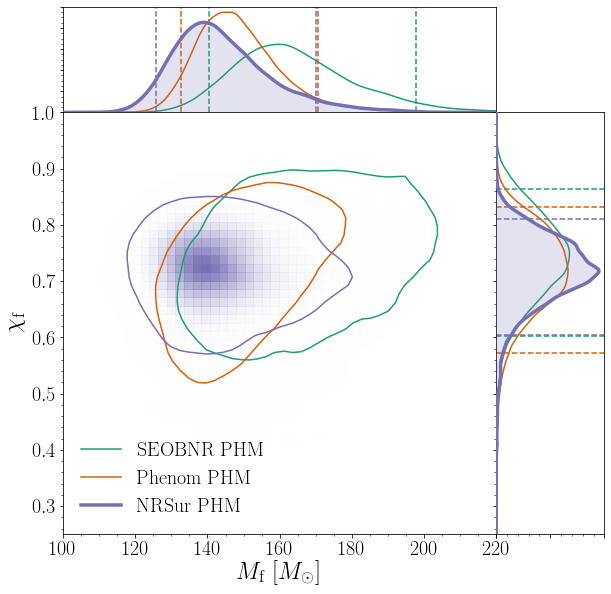

In [12]:
#========================
# Fig-3: mf-af plot 
#========================

samples_dict = dict(IMR=phenom,NRS=nrsur,SEOB=seob)
for key in samples_dict:
    samples_dict[key] = samples_dict[key]

color_dict = dict(NRS="#7570b3", IMR="#d95f02", SEOB="#1b9e77")
label_dict = dict(NRS="NRSur PHM", IMR="Phenom PHM", SEOB="SEOBNR PHM")
alpha_dict = dict(NRS=0.2,IMR=0.2, SEOB=0.2)
lw_dict = dict(NRS=3.5, IMR=1.5, SEOB=1.5)
bins_dict = dict(NRS=50, IMR=50, SEOB=50)


parameter_1 = 'final_mass_source'
parameter_2 = 'final_spin'

xlims = [100, 220]
ylims = [0.25, 1]

norm_factor = 1.60


fig, ax1, ax3, ax4 = create_fig_and_axes(xlims, ylims)
ax3.set_xlabel(r"$M_\mathrm{f} \ [M_\odot]$",fontsize=24)
ax3.set_ylabel(r"$\chi_\mathrm{f} $",fontsize=24)
ax3.tick_params(labelsize=10)

my_array_x=np.linspace(xlims[0],xlims[1],1000)
my_array_y=np.linspace(ylims[0],ylims[1],1000)

r1x=1/np.max(scipy.stats.gaussian_kde(nrsur[parameter_1])(my_array_x))
r2x=1/np.max(scipy.stats.gaussian_kde(phenom[parameter_1])(my_array_x))
r3x=1/np.max(scipy.stats.gaussian_kde(seob[parameter_1])(my_array_x))

r1y=1/np.max(scipy.stats.gaussian_kde(nrsur[parameter_2])(my_array_y))
r2y=1/np.max(scipy.stats.gaussian_kde(phenom[parameter_2])(my_array_y))
r3y=1/np.max(scipy.stats.gaussian_kde(seob[parameter_2])(my_array_y))

norm_factor_x = np.min([r1x,r2x,r3x])
norm_factor_y = np.min([r1y,r2y,r3y])

add_samples_to_fig_nofilled("SEOB",parameter_1,parameter_2,zorder=-10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_2=True,low_2=0.,high_2=1)
add_samples_to_fig_nofilled("IMR",parameter_1,parameter_2, zorder=10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_2=True,low_2=0.,high_2=1)
add_samples_to_fig("NRS",parameter_1,parameter_2,zorder=20,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_2=True,low_2=0.,high_2=1)

ax3.set_xlim(*xlims)
ax1.set_yticklabels([],fontsize=10)
ax4.set_xticklabels([],fontsize=20)
ax3.tick_params(axis='both', labelsize=20)
ax3.legend(*ax4.get_legend_handles_labels(), loc=3, frameon=False,prop={'size': 20})


print("Saving")
fig.savefig(figpath+'mfaf_vf.pdf',format='pdf', transparent=True, bbox_inches='tight')

Saving


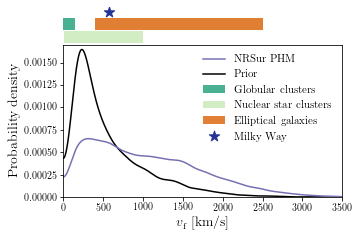

In [13]:
#========================
# Fig-4: kick_mag_vf plot 
#========================
vf = nrsur['final_kick']
vf_prior = prior['final_kick']

label_fontsize = 14
legend_fontsize = 11

galaxy_colors = [u'#1b9e77', u'#c7e9b4', u'#d95f02', u'#253494']
post_prior_colors = ['#7570b3', 'k']


# ---------------------------------------------------------------------------
def set_y_ticks(ax, yticks_str):
    ax.set_yticklabels(yticks_str)
    ax.set_yticks([float(tmp) for tmp in yticks_str])

# ---------------------------------------------------------------------------
def plotter(ax, data, data_prior, xlabel, color=None):

    x_dense = np.linspace(0, 3500, 1000)
    data_kde = Bounded_kde(data, low=0.0)(x_dense)
    data_prior_kde = Bounded_kde(data_prior, low=0.0)(x_dense)
#    data_kde = gaussian_kde(data, bw_method=0.2)(x_dense)
#    data_prior_kde = gaussian_kde(data_prior, bw_method=0.2)(x_dense)
    #norm_factor = 0.95/np.max(data_kde)

    #ax.hist(data, density=True, histtype='step', bins=25, \
    #    color=post_prior_colors[0], label='Posterior', lw=1.5)
    plt.plot(x_dense, data_kde, color=post_prior_colors[0], \
        label='NRSur PHM', lw=1.5)

    #ax.hist(data_prior, density=True, histtype='step', \
    #    bins=25, color=post_prior_colors[1], label='Prior', lw=1.5)
    plt.plot(x_dense, data_prior_kde, color=post_prior_colors[1], \
        label='Prior', lw=1.5, zorder=-1)

    ax.set_xlabel(xlabel, fontsize=label_fontsize)
    ax.set_ylabel("Probability density", fontsize=label_fontsize)

# ---------------------------------------------------------------------------
def plot_rect(ax, yval, vmin, vmax, color, label, height=0.3):
    rect = patches.Rectangle((vmin, yval), vmax-vmin, height, linewidth=1, \
        edgecolor=None, facecolor=color, alpha=0.8, label=label)
    ax.add_patch(rect)

fig = plt.figure(figsize=(5, 3.5))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4])
plt.subplots_adjust(wspace=0, hspace=0)

ax = plt.subplot(gs[1])
plotter(ax, vf, vf_prior, '$v_{\mathrm{f}}$ [km/s]')
ax.set_ylim(0, 1.7e-3)
ax.set_xlim(0, 3500)

# These four are dummies, so we get them into the legend
plot_rect(ax, 0.4, 0, 150, galaxy_colors[0], 'Globular clusters')
plot_rect(ax, 0.05, 10, 1000, galaxy_colors[1], 'Nuclear star clusters')
plot_rect(ax, 0.4, 400, 2500, galaxy_colors[2], 'Elliptical galaxies')
ax.scatter(580, 0.85, label='Milky Way', marker='*', s=120, zorder=10, \
    color=galaxy_colors[3])

ax.legend(loc='upper right', fontsize=legend_fontsize, frameon=0)

ax = plt.subplot(gs[0])
plot_rect(ax, 0.4, 0, 150, galaxy_colors[0], 'Globular clusters')
plot_rect(ax, 0.05, 10, 1000, galaxy_colors[1], 'Nuclear star clusters')
plot_rect(ax, 0.4, 400, 2500, galaxy_colors[2], 'Elliptical galaxies')
ax.scatter(580, 0.85, label='Milky Way', marker='*', s=120, zorder=10, \
    color=galaxy_colors[3])
ax.set_ylim(0, 1)
ax.set_xlim(0, 3500)
ax.axis('off')

print("Saving")
fig.savefig(figpath+'kick_mag_vf_h5.pdf',format='pdf', transparent=True, bbox_inches='tight')

No reflexion done
No reflexion done
No reflexion done
Saving


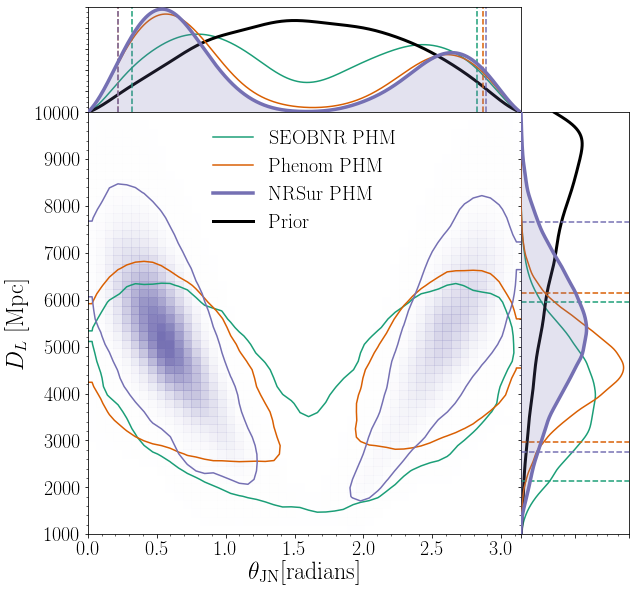

In [14]:
#========================
# Fig-6: theta_JN - D_L plot 
# In this plot, theta_JN is in radians, but elsewhere, it is in degrees.
#=======================

samples_dict = dict(IMR=phenom,NRS=nrsur,SEOB=seob, PRIOR=prior)
for key in samples_dict:
    samples_dict[key] = samples_dict[key]

color_dict = dict(NRS="#7570b3", IMR="#d95f02", SEOB="#1b9e77")
label_dict = dict(NRS="NRSur PHM", IMR="Phenom PHM", SEOB="SEOBNR PHM", PRIOR="Prior")
alpha_dict = dict(NRS=0.2,IMR=0.2, SEOB=0.2)
lw_dict = dict(NRS=3.5, IMR=1.5, SEOB=1.5)
bins_dict = dict(NRS=50, IMR=50, SEOB=50)


parameter_1 = 'theta_jn'
parameter_2 = 'luminosity_distance'

xlims = [0, 3.14159]
ylims = [1000, 10000]

norm_factor = 1.60


fig, ax1, ax3, ax4 = create_fig_and_axes(xlims, ylims)
ax3.set_xlabel(r"$\theta_\mathrm{JN}\ [\mathrm{radians}]$",fontsize=24) 
ax3.set_ylabel(r"$D_L \ [\mathrm{Mpc}]$",fontsize=24)
ax3.tick_params(labelsize=10)

my_array_x=np.linspace(xlims[0],xlims[1],1000)
my_array_y=np.linspace(ylims[0],ylims[1],1000)

r1x=1/np.max(scipy.stats.gaussian_kde(nrsur[parameter_1])(my_array_x))
r2x=1/np.max(scipy.stats.gaussian_kde(phenom[parameter_1])(my_array_x))
r3x=1/np.max(scipy.stats.gaussian_kde(seob[parameter_1])(my_array_x))
r4x=1/np.max(scipy.stats.gaussian_kde(prior[parameter_1])(my_array_x))

r1y=1/np.max(scipy.stats.gaussian_kde(nrsur[parameter_2])(my_array_y))
r2y=1/np.max(scipy.stats.gaussian_kde(phenom[parameter_2])(my_array_y))
r3y=1/np.max(scipy.stats.gaussian_kde(seob[parameter_2])(my_array_y))
r4y=1/np.max(scipy.stats.gaussian_kde(prior[parameter_2])(my_array_x))

norm_factor_x = np.min([r1x,r2x,r3x, r4x])
norm_factor_y = np.min([r1y,r2y,r3y, r4y])


add_samples_to_fig_nofilled("SEOB",parameter_1,parameter_2, zorder=-10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_1=True,low_1=0,high_1=np.pi)
add_samples_to_fig_nofilled("IMR",parameter_1,parameter_2, zorder=10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_1=True,low_1=0,high_1=np.pi)
add_samples_to_fig("NRS",parameter_1,parameter_2,zorder=20,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_1=True,low_1=0,high_1=np.pi)
#add_prior("PRIOR",parameter_1,parameter_2,zorder=-10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_1=True,low_1=0,high_1=np.pi)
add_prior_bounded("PRIOR",parameter_1,parameter_2,zorder=-10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_1=True,low_1=0,high_1=np.pi)


ax3.set_xlim(*xlims)
ax1.set_yticklabels([],fontsize=10)
ax4.set_xticklabels([],fontsize=20)
ax3.legend(*ax4.get_legend_handles_labels(), loc=9, frameon=False,prop={'size': 20})
ax3.tick_params(axis='both', labelsize=20)

print("Saving")
fig.savefig(figpath+'dtheta_vf.pdf',format='pdf', transparent=True, bbox_inches='tight')

No reflexion done
No reflexion done
No reflexion done
Saving


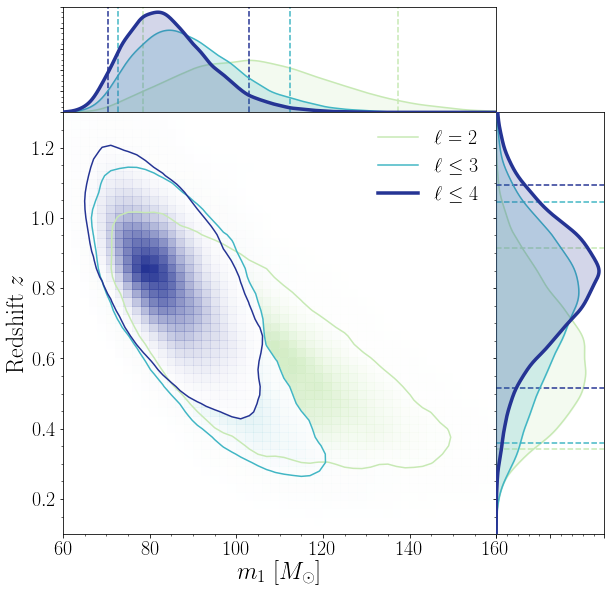

In [15]:
#========================
# Fig-7: m1 - z plot for HMs 
#=======================

samples_dict = dict(l2=nrs_l2,l3=nrs_l3,l4=nrs_l4)
for key in samples_dict:
    samples_dict[key] = samples_dict[key]

color_dict = dict(l4="#253494", l3="#41b6c4", l2="#c7e9b4")

label_dict = dict(l2=r"$\ell = 2$", l3=r"$\ell \leq 3$", l4=r"$\ell \leq 4$")
alpha_dict = dict(l4=0.2,l3=0.2, l2=0.2)
lw_dict = dict(l4=3.5, l3=1.5, l2=1.5)
bins_dict = dict(l4=50, l3=50, l2=50)


parameter_1 = 'mass_1_source'
parameter_2 = 'redshift'

xlims = [60, 160]
ylims = [0.1, 1.3]

norm_factor = 1.60


fig, ax1, ax3, ax4 = create_fig_and_axes(xlims, ylims)
ax3.set_xlabel(r"$m_1 \ [M_\odot]$",fontsize=24)
ax3.set_ylabel(r"Redshift $z$",fontsize=24)
ax3.tick_params(labelsize=10)

my_array_x=np.linspace(xlims[0],xlims[1],1000)
my_array_y=np.linspace(ylims[0],ylims[1],1000)

r1x=1/np.max(scipy.stats.gaussian_kde(nrs_l2[parameter_1])(my_array_x))
r2x=1/np.max(scipy.stats.gaussian_kde(nrs_l2[parameter_1])(my_array_x))
r3x=1/np.max(scipy.stats.gaussian_kde(nrs_l4[parameter_1])(my_array_x))

r1y=1/np.max(scipy.stats.gaussian_kde(nrs_l2[parameter_2])(my_array_y))
r2y=1/np.max(scipy.stats.gaussian_kde(nrs_l3[parameter_2])(my_array_y))
r3y=1/np.max(scipy.stats.gaussian_kde(nrs_l4[parameter_2])(my_array_y))

norm_factor_x = np.min([r1x,r2x,r3x])
norm_factor_y = np.min([r1y,r2y,r3y])

add_samples_to_fig("l2",parameter_1,parameter_2,zorder=-10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)
add_samples_to_fig("l3",parameter_1,parameter_2, zorder=10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)
add_samples_to_fig("l4",parameter_1,parameter_2,zorder=20,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)

ax3.set_xlim(*xlims)
ax1.set_yticklabels([],fontsize=10)
ax4.set_xticklabels([],fontsize=20)
ax3.tick_params(axis='both', labelsize=20)
ax3.legend(*ax4.get_legend_handles_labels(), loc=0, frameon=False,prop={'size': 20})


print("Saving")
fig.savefig(figpath+'m1HM_vf.pdf',format='pdf', transparent=True, bbox_inches='tight')

Using bounded KDE
No reflexion done
Using bounded KDE
No reflexion done
Using bounded KDE
No reflexion done
Using bounded KDE
No reflexion done
Saving


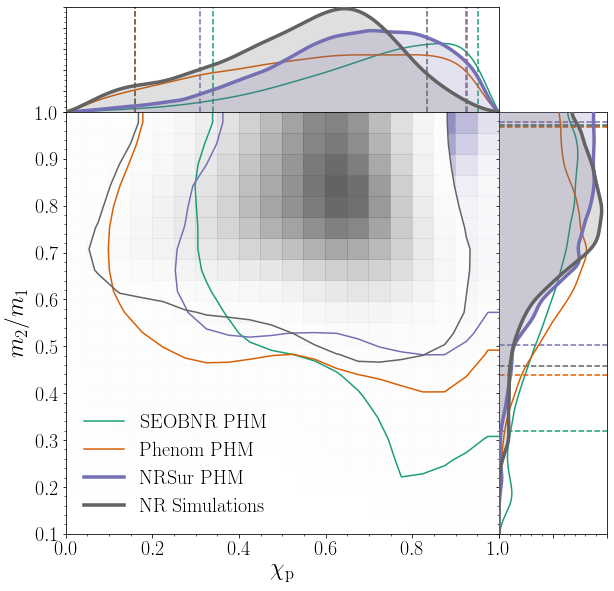

In [16]:
#==========================================
# Fig-8: chi_p-q plot with NR simulations 
#=========================================

samples_dict = dict(IMR=phenom,NRS=nrsur,SEOB=seob, NR=nr_sim)
for key in samples_dict:
    samples_dict[key] = samples_dict[key]

color_dict = dict(NRS="#7570b3", IMR="#d95f02", SEOB="#1b9e77", NR='#636363')
label_dict = dict(NRS="NRSur PHM", IMR="Phenom PHM", SEOB="SEOBNR PHM", NR="NR Simulations")
alpha_dict = dict(NRS=0.2,IMR=0.2, SEOB=0.2, NR=0.2)
lw_dict = dict(NRS=3.5, IMR=1.5, SEOB=1.5, NR=3.5)
bins_dict = dict(NRS=20, IMR=20, SEOB=20, NR=20)


parameter_1 = 'chi_p'
parameter_2 = 'mass_ratio'

xlims = [0, 1]
ylims = [0.1, 1]

norm_factor = 1.60


fig, ax1, ax3, ax4 = create_fig_and_axes(xlims, ylims)
ax3.set_xlabel(r"$\chi_\mathrm{p}$",fontsize=24)
ax3.set_ylabel(r"$m_2/m_1$",fontsize=24)
ax3.tick_params(labelsize=10)

my_array_x=np.linspace(xlims[0],xlims[1],1000)
my_array_y=np.linspace(ylims[0],ylims[1],1000)

r1x=1/np.max(scipy.stats.gaussian_kde(nrsur[parameter_1])(my_array_x))
r2x=1/np.max(scipy.stats.gaussian_kde(phenom[parameter_1])(my_array_x))
r3x=1/np.max(scipy.stats.gaussian_kde(seob[parameter_1])(my_array_x))
r4x=1/np.max(scipy.stats.gaussian_kde(nr_sim['chi_p'])(my_array_x))

r1y=1/np.max(scipy.stats.gaussian_kde(nrsur[parameter_2])(my_array_y))
r2y=1/np.max(scipy.stats.gaussian_kde(phenom[parameter_2])(my_array_y))
r3y=1/np.max(scipy.stats.gaussian_kde(seob[parameter_2])(my_array_y))
r4y=1/np.max(scipy.stats.gaussian_kde(nr_sim['mass_ratio'])(my_array_y))


norm_factor_x = np.min([r1x,r2x,r3x, r4x])
norm_factor_y = np.min([r1y,r2y,r3y, r4y])

add_samples_to_fig_nofilled("SEOB",parameter_1,parameter_2,zorder=-10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_1=True,low_1=0,high_1=1,bounded_2=True,low_2=0,high_2=1)
add_samples_to_fig_nofilled("IMR",parameter_1,parameter_2, zorder=10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_1=True,low_1=0,high_1=1,bounded_2=True,low_2=0,high_2=1)
add_samples_to_fig("NRS",parameter_1,parameter_2,zorder=20,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_1=True,low_1=0,high_1=1,bounded_2=True,low_2=0,high_2=1)
add_samples_to_fig("NR",'chi_p','mass_ratio',zorder=20,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_1=True,low_1=0,high_1=1,bounded_2=True,low_2=0,high_2=1)


ax3.set_xlim(*xlims)
ax1.set_yticklabels([],fontsize=10)
ax4.set_xticklabels([],fontsize=20)
ax3.legend(*ax4.get_legend_handles_labels(), loc=3, frameon=False,prop={'size': 20})
ax3.tick_params(axis='both', labelsize=20)

print("Saving")
fig.savefig(figpath+'NRqchip_vf.pdf',format='pdf', transparent=True, bbox_inches='tight')

No reflexion done
No reflexion done
No reflexion done
Saving


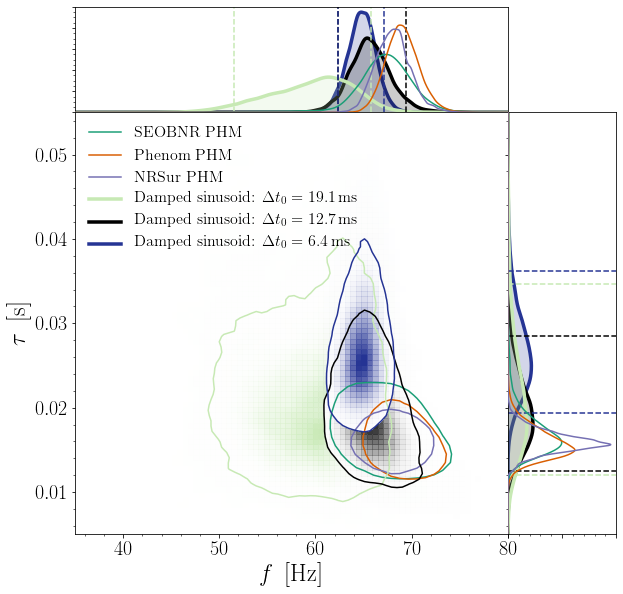

In [17]:
#==========================================
# Fig-9-left: Ringdown_figure_ftau_vf 
#=========================================

start_times_dict = {}
Mf_NRSur_median = 258.3
start_times_list = [5,10,15]
for st_time in start_times_list:
    start_times_dict['{}M'.format(st_time)] = 1e-1*int(round(lal.MTSUN_SI*Mf_NRSur_median*st_time*1e4))
    
samples_dict = dict(IMR=phenom_ftau,NRS=nrsur_ftau,SEOB=seob_ftau, fiveM=Damped_sinusoid_5M, tenM=Damped_sinusoid_10M,fifteenM=Damped_sinusoid_15M)
for key in samples_dict:
    samples_dict[key] = samples_dict[key]

#color_dict = dict(NRS="#7570b3", IMR="#d95f02", SEOB="#1b9e77", fiveM='#253494', tenM='#9ecae1', fifteenM='#c7e9b4')
color_dict = dict(NRS="#7570b3", IMR="#d95f02", SEOB="#1b9e77", fiveM='#253494', tenM='black', fifteenM='#c7e9b4')
label_dict = dict(NRS="NRSur PHM", IMR="Phenom PHM", SEOB="SEOBNR PHM", fiveM="Damped sinusoid: $\Delta t_0 = %.1f \, \mathrm{ms}$"%(start_times_dict['5M']),tenM="Damped sinusoid: $\Delta t_0 = %.1f \, \mathrm{ms}$"%(start_times_dict['10M']), fifteenM="Damped sinusoid: $\Delta t_0 = %.1f \, \mathrm{ms}$"%(start_times_dict['15M']) )
alpha_dict = dict(NRS=0.2,IMR=0.2, SEOB=0.2, fiveM=0.2, tenM=0.2, fifteenM=0.2)
lw_dict = dict(NRS=1.5, IMR=1.5, SEOB=1.5 , fiveM=3.5, tenM=3.5, fifteenM=3.5)
bins_dict = dict(NRS=50, IMR=50, SEOB=50, fiveM=80, tenM=80, fifteenM=80)


parameter_1 = 'f'
parameter_2 = 'tau'

xlims = [35, 80]
ylims = [0.005, 0.055]

norm_factor = 1.60


fig, ax1, ax3, ax4 = create_fig_and_axes(xlims, ylims)
ax3.set_xlabel(r"$f \, ~[\mathrm{Hz}$]",fontsize=24)
ax3.set_ylabel(r"$\tau \, ~[\mathrm{s}$]",fontsize=24)
ax3.tick_params(labelsize=10)

my_array_x=np.linspace(xlims[0],xlims[1],1000)
my_array_y=np.linspace(ylims[0],ylims[1],1000)

r1x=1/np.max(scipy.stats.gaussian_kde(nrsur_ftau[parameter_1])(my_array_x))
r2x=1/np.max(scipy.stats.gaussian_kde(phenom_ftau[parameter_1])(my_array_x))
r3x=1/np.max(scipy.stats.gaussian_kde(seob_ftau[parameter_1])(my_array_x))
r4x=1/np.max(scipy.stats.gaussian_kde(Damped_sinusoid_5M['f_t_0'])(my_array_x))
r5x=1/np.max(scipy.stats.gaussian_kde(Damped_sinusoid_10M['f_t_0'])(my_array_x))
r6x=1/np.max(scipy.stats.gaussian_kde(Damped_sinusoid_15M['f_t_0'])(my_array_x))

r1y=1/np.max(scipy.stats.gaussian_kde(nrsur_ftau[parameter_2])(my_array_y))
r2y=1/np.max(scipy.stats.gaussian_kde(phenom_ftau[parameter_2])(my_array_y))
r3y=1/np.max(scipy.stats.gaussian_kde(seob_ftau[parameter_2])(my_array_y))
r4y=1/np.max(scipy.stats.gaussian_kde(Damped_sinusoid_5M['tau_t_0'])(my_array_y))
r5y=1/np.max(scipy.stats.gaussian_kde(Damped_sinusoid_10M['tau_t_0'])(my_array_y))
r6y=1/np.max(scipy.stats.gaussian_kde(Damped_sinusoid_15M['tau_t_0'])(my_array_y))
                  
norm_factor_x = np.min([r1x,r2x,r3x, r4x, r5x, r6x])
norm_factor_y = np.min([r1y,r2y,r3y, r4y, r5y, r6y])

add_samples_to_fig_rd("SEOB",parameter_1,parameter_2,zorder=10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)
add_samples_to_fig_rd("IMR",parameter_1,parameter_2, zorder=20,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)
add_samples_to_fig_rd("NRS",parameter_1,parameter_2,zorder=30,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)
add_samples_to_fig("fifteenM",'f_t_0','tau_t_0', zorder=-10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)
add_samples_to_fig("tenM",'f_t_0','tau_t_0', zorder=-20,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)
add_samples_to_fig("fiveM",'f_t_0','tau_t_0', zorder=-30,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)


ax3.set_xlim(*xlims)
ax1.set_yticklabels([],fontsize=10)
ax4.set_xticklabels([],fontsize=20)
ax3.tick_params(axis='both', labelsize=20)
ax3.legend(*ax4.get_legend_handles_labels(), loc=2, frameon=False,prop={'size': 16})

print("Saving")
fig.savefig(figpath+'Ringdown_figure_ftau_vf.pdf',format='pdf', transparent=True, bbox_inches='tight')

Using bounded KDE
No reflexion done
Using bounded KDE
No reflexion done
Using bounded KDE
No reflexion done
Saving


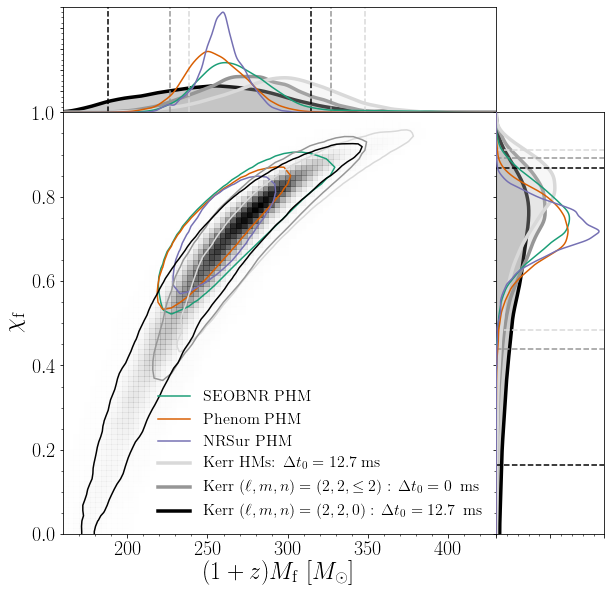

In [18]:
#==========================================
# Fig-9-right: Ringdown_figure_Mfaf_vf 
#=========================================

samples_dict = dict(IMR=phenom,NRS=nrsur,SEOB=seob, kkerr_220=Kerr_220, kkerr_222=Kerr_222, kkerr_HM=Kerr_HM)
for key in samples_dict:
    samples_dict[key] = samples_dict[key]

color_dict = dict(NRS="#7570b3", IMR="#d95f02", SEOB="#1b9e77", kkerr_HM='#d9d9d9', kkerr_222='#969696', kkerr_220='black')
label_dict = dict(NRS="NRSur PHM", IMR="Phenom PHM", SEOB="SEOBNR PHM", kkerr_220 ="Kerr $(\ell,m,n)=(2,2,0): \, \Delta t_0 = 12.7 \, ~\mathrm{ms}$", kkerr_222 ="Kerr $(\ell,m,n)=(2,2,\leq 2): \, \Delta t_0 = 0 \, ~\mathrm{ms}$", kkerr_HM  ="Kerr HMs: $\Delta t_0  = 12.7~\mathrm{ms}$")
alpha_dict = dict(NRS=0.2,IMR=0.2, SEOB=0.2, kkerr_220=0.2, kkerr_222=0.2, kkerr_HM=0.2)
lw_dict = dict(NRS=1.5, IMR=1.5, SEOB=1.5 , kkerr_220=3.5, kkerr_222=3.5, kkerr_HM=3.5)
bins_dict = dict(NRS=50, IMR=50, SEOB=50, kkerr_220=80, kkerr_222=50, kkerr_HM=80)


parameter_1 = 'final_mass'
parameter_2 = 'final_spin'

xlims = [160, 430]
ylims = [0, 1]

norm_factor = 1.60


fig, ax1, ax3, ax4 = create_fig_and_axes(xlims, ylims)
ax3.set_xlabel(r"$(1+z)M_{\mathrm{f}}\;[M_\odot]$",fontsize=24)
ax3.set_ylabel(r"$\chi_\mathrm{f} $",fontsize=24)
ax3.tick_params(labelsize=10)

my_array_x=np.linspace(xlims[0],xlims[1],1000)
my_array_y=np.linspace(ylims[0],ylims[1],1000)

r1x=1/np.max(scipy.stats.gaussian_kde(nrsur[parameter_1])(my_array_x))
r2x=1/np.max(scipy.stats.gaussian_kde(phenom[parameter_1])(my_array_x))
r3x=1/np.max(scipy.stats.gaussian_kde(seob[parameter_1])(my_array_x))
r4x=1/np.max(scipy.stats.gaussian_kde(Kerr_220['Mf'])(my_array_x))
r5x=1/np.max(scipy.stats.gaussian_kde(Kerr_222['Mf'])(my_array_x))
r6x=1/np.max(scipy.stats.gaussian_kde(Kerr_HM['Mf'])(my_array_x))

r1y=1/np.max(scipy.stats.gaussian_kde(nrsur[parameter_2])(my_array_y))
r2y=1/np.max(scipy.stats.gaussian_kde(phenom[parameter_2])(my_array_y))
r3y=1/np.max(scipy.stats.gaussian_kde(seob[parameter_2])(my_array_y))
r4y=1/np.max(scipy.stats.gaussian_kde(Kerr_220['af'])(my_array_y))
r5y=1/np.max(scipy.stats.gaussian_kde(Kerr_222['af'])(my_array_y))
r6y=1/np.max(scipy.stats.gaussian_kde(Kerr_HM['af'])(my_array_y))
                  
norm_factor_x = np.min([r1x,r2x,r3x, r4x, r5x, r6x])
norm_factor_y = np.min([r1y,r2y,r3y, r4y, r5y, r6y])

add_samples_to_fig_rd("SEOB",parameter_1,parameter_2,zorder=10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)
add_samples_to_fig_rd("IMR",parameter_1,parameter_2, zorder=20,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)
add_samples_to_fig_rd("NRS",parameter_1,parameter_2,zorder=30,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y)
add_samples_to_fig("kkerr_HM",'Mf','af', zorder=-10,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_2=True,low_2=0.,high_2=1)
add_samples_to_fig("kkerr_222",'Mf','af', zorder=-20,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_2=True,low_2=0.,high_2=1)
add_samples_to_fig("kkerr_220",'Mf','af', zorder=-30,norm_factor_x=norm_factor_x,norm_factor_y=norm_factor_y,bounded_2=True,low_2=0.,high_2=1)


ax3.set_xlim(*xlims)
ax1.set_yticklabels([],fontsize=10)
ax4.set_xticklabels([],fontsize=20)
ax3.tick_params(axis='both', labelsize=20)
ax3.legend(*ax4.get_legend_handles_labels(), loc=4, frameon=False,prop={'size': 16})

print("Saving")
fig.savefig(figpath+'Ringdown_figure_Mfaf_vf.pdf',format='pdf', transparent=True, bbox_inches='tight')

{'GW150914': [35.6, -3.1, 4.7, 30.6, -4.4, 3.0, 63.1, -3.0, 3.4], 'GW151012': [23.2, -5.5, 14.9, 13.6, -4.8, 4.1, 35.6, -3.8, 10.8], 'GW151226': [13.7, -3.2, 8.8, 7.7, -2.5, 2.2, 20.5, -1.5, 6.4], 'GW170104': [30.8, -5.6, 7.3, 20.0, -4.6, 4.9, 48.9, -4.0, 5.1], 'GW170608': [11.0, -1.7, 5.5, 7.6, -2.2, 1.4, 17.8, -0.7, 3.4], 'GW170729': [50.2, -10.2, 16.2, 34.0, -10.1, 9.1, 79.5, -10.2, 14.7], 'GW170809': [35.0, -5.9, 8.3, 23.8, -5.2, 5.1, 56.3, -3.8, 5.2], 'GW170814': [30.6, -3.0, 5.6, 25.2, -4.0, 2.8, 53.2, -2.4, 3.2], 'GW170818': [35.4, -4.7, 7.5, 26.7, -5.2, 4.3, 59.4, -3.8, 4.9], 'GW170823': [39.5, -6.7, 11.2, 29.0, -7.8, 6.7, 65.4, -7.4, 10.1], 'GW190521': [85.0, -14.0, 21.0, 66.0, -18.0, 17.0, 142.0, -16.0, 28.0]}
Saving


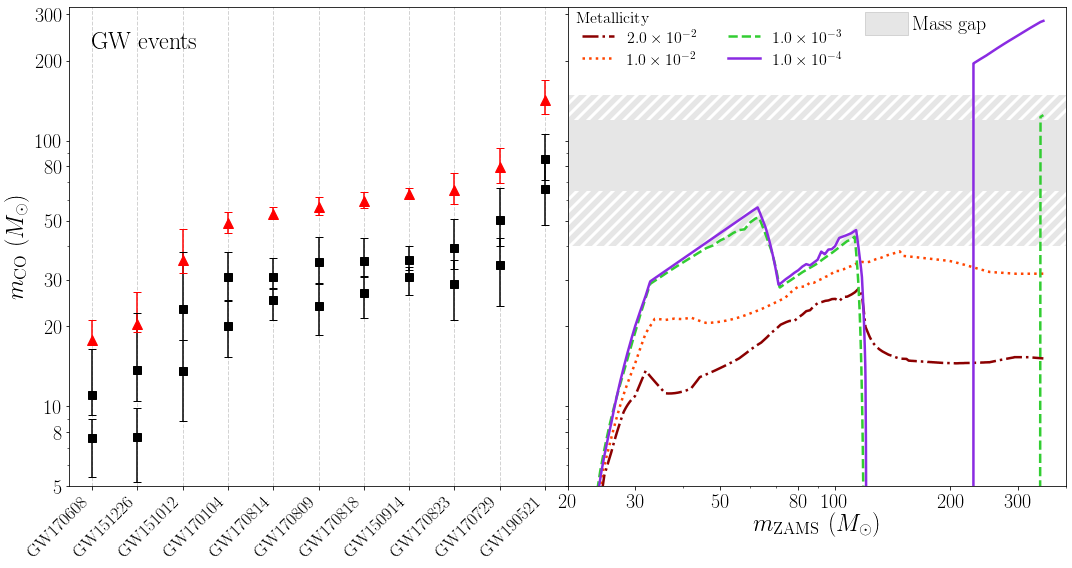

In [19]:
###############################################################
# Fig-10: GW190521_mass_gap 2-panel plot
##############################################################

#############
# get the names of GWTC-1 events from GWOSC:
import urllib.request
import json
catalogurl = "https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/"
catalog = json.loads(urllib.request.urlopen(catalogurl).read())
events = catalog['events'].keys()

# mass name-keys in the parameter dicts
parms = ['mass_1_source', 'mass_1_source_lower', 'mass_1_source_upper',
         'mass_2_source', 'mass_2_source_lower', 'mass_2_source_upper',
         'mfinal', 'mfinal_lower', 'mfinal_upper']

# dictionary for the data
evs = {}
# loop over GWTC-1 events
for event in events:
    # get the json for this event
    jevent = json.loads(urllib.request.urlopen(catalog['events'][event]['jsonurl']).read())
    # parse out the mass parameters
    params = jevent['events'][event]['parameters']['gwtc1_pe_' + event[0:8]]
    # put in the dictionary
    evs[event[0:8]] = [params[parm] for parm in parms]

# remove the BNS
del evs['GW170817']
# now add GW190521 mass params from Table 1 - HARD CODED!!
evs['GW190521'] = [85., -14., 21., 66., -18., 17., 142., -16., 28.]
# write it out to a json file
with open('eventdata.json', 'w') as outfile:
    json.dump(evs, outfile)

print(evs)

# prepare the layout
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 8), gridspec_kw = {'wspace':0, 'hspace':0})


#####################################
# Left-hand panel of the plot
#####################################

# sort events using item 6 (mass of the merger product)
sorted_events = enumerate(sorted(evs.items(), key=lambda item: item[1][6]))
xlabels = np.empty(len(evs), dtype="U20")

# loop over sorted events
for ie, (event, ems) in sorted_events:
    ems = np.abs(np.array(ems))  # errors must be positive
    ax1.errorbar(ie, ems[0], yerr=[[ems[1]], [ems[2]]], fmt='ks', linewidth=1.5, capsize=4, markersize=8)  # error on m1
    ax1.errorbar(ie, ems[3], yerr=[[ems[4]], [ems[5]]], fmt='ks', linewidth=1.5, capsize=4, markersize=8)  # error on m2
    ax1.errorbar(ie, ems[6], yerr=[[ems[7]], [ems[8]]], fmt='r^', linewidth=1.5, capsize=4, markersize=10)  # error on m_merger
    xlabels[ie] = event  # prepare xlabels according to event name
    ax1.plot()


# set xlabels and ticks
ax1.set_xticks(np.arange(len(evs)))
ax1.set_xticklabels(xlabels, fontsize=18, rotation=45, ha='right')

# set other plot properties
ax1.grid(axis='x', color='lightgrey', linestyle='dashed', linewidth=1)
ax1.text(0, 220, 'GW events', fontsize=24)
ax1.set_xlim([-0.5, 10.5])
ax1.set_ylim([5., 320])
ax1.set_ylabel('$m_{\mathrm{CO}}\ (M_\odot)$', fontsize=24)

# make the y axis log abd adjust yticks and labels
ax1.set_yscale('log')
ax1.set_yticks([5, 8, 10, 20, 30, 50, 80, 100, 200, 300])
ax1.tick_params(axis="y", labelsize=20)


# do not use scientific notation on the y axis
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax1.yaxis.set_major_formatter(formatter)



#####################################
# Right-hand panel of the plot
#####################################
# read in the data file downloaded from https://dcc.ligo.org/P2000158/public
file = open('GW190521_Implications_figure_data/Data_mrem_mzams.dat', 'r')
Lines = file.readlines()

# read header (metallicities and columns per metallicity)
metallicities = Lines[0].split()
headersperZ = Lines[1].split()
columns = len(headersperZ)*len(metallicities)  # total number of columns
datadim = len(Lines)-2  # number of lines (data) to read

data = np.empty([columns, datadim])  # ready to collect all data
data[:] = np.NaN  # initialize data with missing values


# read data
for t in range(2, len(Lines)):
    for k in range(0, len(Lines[t].split())):  # columns may have different lengths!!
        if Lines[t].split()[k] != '--' and Lines[t].split()[k] != ' ':   # if a value is not in a column then it is marked with "--"
            data[k][t-2] = float(Lines[t].split()[k])


# check which column is which... we want to plot, for each metallicity mrem vs mzams
for i in range(len(headersperZ)):
    if headersperZ[i] == 'mzams':
        col1 = i
    elif headersperZ[i] == 'mrem':
        col2 = i
    else:
        raise Exception('Unrecognized column name. Column was: {}'.format(headersperZ[i]))


# decide colors for the different curves
_colorpalette = ['darkred', 'orangered', 'limegreen', 'blueviolet']
_linestyles = ['dashdot', 'dotted', 'dashed', 'solid']
if len(_colorpalette) != len(metallicities) or len(_linestyles) != len(metallicities):
    raise Exception('Please add more colors and/or linestyles to the colorpalette/linestyles arrays.')


# plot, for each metallicity, col2 vs col1 (mrem vs mzams)
for Z in range (len(metallicities)):
    offsetcol = Z*len(headersperZ)
    ax2.plot(data[col1+offsetcol], data[col2+offsetcol], color=_colorpalette[Z], linestyle=_linestyles[Z], linewidth=2.5)


# set general properties for right-hand panel
ax2.set_xlim([20, 400])
ax2.set_xscale('log')
ax2.set_xticks([20, 30, 50, 80, 100, 200, 300])
ax2.tick_params(axis="x", labelsize=20)
ax2.set_xlabel('$m_{\mathrm{ZAMS}}\ (M_\odot)$', fontsize=24)

# do not use scientific notation on the x axis (same formatter, as in the left-hand plot)
ax2.xaxis.set_major_formatter(formatter)


# draw the mass gap
plt.rcParams['hatch.linewidth'] = 3.0   # width of the white hatches for the error region in the mass gap
ax2.axhspan(40, 65, facecolor='#E6E6E6', hatch='//', edgecolor='white')  # uncertainty on the lower edge
ax2.axhspan(120, 150, facecolor='#E6E6E6', hatch='//', edgecolor='white')  # uncertainty on the upper edge
ax2.axhspan(65, 120, facecolor='#E6E6E6', edgecolor='#E6E6E6')  # upper mass gap



# Zbase and Zexponent are read from the header of the input file and transformed into latex for the legend
Zbase = np.empty(len(metallicities))
Zexponent = np.empty(len(metallicities), dtype=int)
for Z in range (len(metallicities)):
    Zbase[Z] = metallicities[Z].split('e')[0]
    Zexponent[Z] = metallicities[Z].split('e')[1]

# elements to include in the legend
legend_elements = []
for Z in range (len(metallicities)):
    legend_elements.append(ld([0], [0], color=_colorpalette[Z], linestyle=_linestyles[Z], linewidth=2.5, label="${0} \\times 10^{{{1}}}$".format(Zbase[Z], Zexponent[Z])))

# draw the legend
ax2.text(21, 280, 'Metallicity', fontsize=16)
ax2.legend(handles=legend_elements, ncol=2, loc='upper left', bbox_to_anchor=(0,0.98), frameon=False, prop={'size': 16})
rect = patches.Rectangle((120, 250), 35, 55, edgecolor='lightgrey', facecolor='#E6E6E6')
ax2.add_patch(rect)
ax2.text(160, 260, 'Mass gap', fontsize=20)

# save pdf file
print("Saving")
plt.tight_layout()
plt.savefig(figpath+'GW190521_mass_gap.pdf',format='pdf', transparent=True, bbox_inches='tight')
###############################################################


Saving


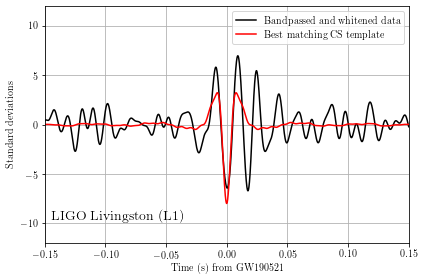

In [20]:
###############################################################
# Fig-13: GW190521 cosmic string plot
##############################################################

# read in the data from the cosmic string analysis, from https://dcc.ligo.org/P2000158/public
hd = np.loadtxt('GW190521_Implications_figure_data/cosmicstring_h1_data.txt').T
ht = np.loadtxt('GW190521_Implications_figure_data/cosmicstring_h1_template.txt').T
ld = np.loadtxt('GW190521_Implications_figure_data/cosmicstring_l1_data.txt').T
lt = np.loadtxt('GW190521_Implications_figure_data/cosmicstring_l1_template.txt').T

# and plot it (LIGO Livingston only)
plt.figure()
plt.plot(ld[0],ld[1],'k',label='Bandpassed and whitened data')
plt.plot(lt[0],lt[1],'r',label='Best matching CS template')
plt.xlabel('Time (s) from GW190521')   # 1242442967.45
plt.ylabel('Standard deviations')
plt.text(-0.145,-9.5,'LIGO Livingston (L1)',fontsize=14)
plt.xlim([-0.15,0.15])
plt.ylim([-12.,12.])
plt.grid()
plt.legend()

print("Saving")
plt.tight_layout()
plt.savefig(figpath+'cosmicstring.pdf',format='pdf', transparent=True, bbox_inches='tight')

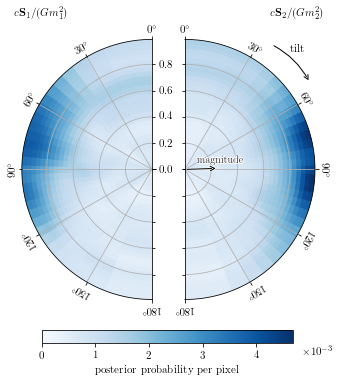

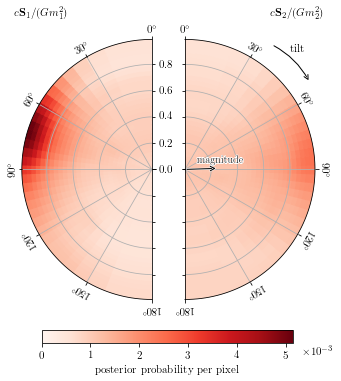

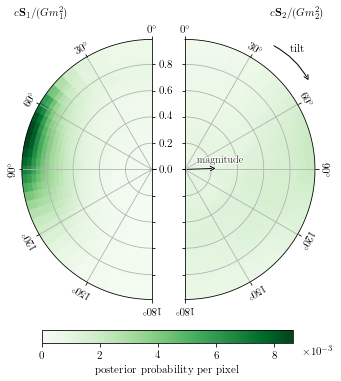

In [21]:
###############################################################
# Fig-2: GW190521 spin-disk plots
##############################################################

from scipy.stats import gaussian_kde as kde

# imports to set up matplotlib for spin-disk plots
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
from matplotlib.patches import Wedge
from matplotlib import patheffects as PathEffects
from matplotlib.collections import PatchCollection

from mpl_toolkits.axisartist.grid_finder import MaxNLocator
import mpl_toolkits.axisartist.floating_axes as floating_axes
import mpl_toolkits.axisartist.angle_helper as angle_helper

rc_params = {'backend': 'ps',
             'axes.labelsize': 11,
             'axes.titlesize': 10,
             'font.size': 11,
             'legend.fontsize': 10,
             'xtick.labelsize': 11,
             'ytick.labelsize': 11,
             'font.family': 'Times New Roman'}

plt.rcParams.update(rc_params)

# color maps for the three waveform models
cmaps = {'NRSur7dq4': plt.cm.Blues, 'IMRPhenomPv3HM': plt.cm.Reds, 'SEOBNRv4PHM': plt.cm.Greens}

#####################################
# 2D (spin) posterior distribution estimates will be kde-smoothed and bounded

class Bounded_2d_kde(kde):
    r"""Represents a two-dimensional Gaussian kernel density estimator  
        for a probability distribution function that exists on a bounded domain."""

    def __init__(self, pts, xlow=None, xhigh=None, ylow=None, yhigh=None, *args, **kwargs):
        """Initialize with the given bounds.  Either ``low`` or
        ``high`` may be ``None`` if the bounds are one-sided.  Extra
        parameters are passed to :class:`gaussian_kde`.

        :param xlow: The lower x domain boundary.

        :param xhigh: The upper x domain boundary.

        :param ylow: The lower y domain boundary.

        :param yhigh: The upper y domain boundary.
        """
        pts = np.atleast_2d(pts)

        assert pts.ndim == 2, 'Bounded_kde can only be two-dimensional'

        super(Bounded_2d_kde, self).__init__(pts.T, *args, **kwargs)

        self._xlow = xlow
        self._xhigh = xhigh
        self._ylow = ylow
        self._yhigh = yhigh

    @property
    def xlow(self):
        """The lower bound of the x domain."""
        return self._xlow

    @property
    def xhigh(self):
        """The upper bound of the x domain."""
        return self._xhigh

    @property
    def ylow(self):
        """The lower bound of the y domain."""
        return self._ylow

    @property
    def yhigh(self):
        """The upper bound of the y domain."""
        return self._yhigh

    def evaluate(self, pts):
        """Return an estimate of the density evaluated at the given
        points."""
        pts = np.atleast_2d(pts)
        assert pts.ndim == 2, 'points must be two-dimensional'

        x, y = pts.T
        pdf = super(Bounded_2d_kde, self).evaluate(pts.T)
        if self.xlow is not None:
            pdf += super(Bounded_2d_kde, self).evaluate([2*self.xlow - x, y])

        if self.xhigh is not None:
            pdf += super(Bounded_2d_kde, self).evaluate([2*self.xhigh - x, y])

        if self.ylow is not None:
            pdf += super(Bounded_2d_kde, self).evaluate([x, 2*self.ylow - y])

        if self.yhigh is not None:
            pdf += super(Bounded_2d_kde, self).evaluate([x, 2*self.yhigh - y])

        if self.xlow is not None:
            if self.ylow is not None:
                pdf += super(Bounded_2d_kde, self).evaluate([2*self.xlow - x, 2*self.ylow - y])

            if self.yhigh is not None:
                pdf += super(Bounded_2d_kde, self).evaluate([2*self.xlow - x, 2*self.yhigh - y])

        if self.xhigh is not None:
            if self.ylow is not None:
                pdf += super(Bounded_2d_kde, self).evaluate([2*self.xhigh - x, 2*self.ylow - y])
            if self.yhigh is not None:
                pdf += super(Bounded_2d_kde, self).evaluate([2*self.xhigh - x, 2*self.yhigh - y])

        return pdf

    def __call__(self, pts):
        pts = np.atleast_2d(pts)
        out_of_bounds = np.zeros(pts.shape[0], dtype='bool')

        if self.xlow is not None:
            out_of_bounds[pts[:, 0] < self.xlow] = True
        if self.xhigh is not None:
            out_of_bounds[pts[:, 0] > self.xhigh] = True
        if self.ylow is not None:
            out_of_bounds[pts[:, 1] < self.ylow] = True
        if self.yhigh is not None:
            out_of_bounds[pts[:, 1] > self.yhigh] = True

        results = self.evaluate(pts)
        results[out_of_bounds] = 0.
        return results


#####################################
# make the spin disk plot
def plot_spin_disk(waveform,outfile):

    # color map for this waveform model:
    cmap = cmaps[waveform]
    
    # compute the 2D spin posteriors with bounded kde smoothing
    a1 = samples_file[waveform]['posterior_samples']['a_1']
    a2 = samples_file[waveform]['posterior_samples']['a_2']
    ct1 = np.cos(samples_file[waveform]['posterior_samples']['tilt_1'])
    ct2 = np.cos(samples_file[waveform]['posterior_samples']['tilt_2'])
    sc1 = np.array([a1,ct1]).T.reshape(-1, 2)
    sc2 = np.array([a2,ct2]).T.reshape(-1, 2)

    scale = 0.99/0.99
    spin1 = Bounded_2d_kde(sc1, xlow=0, xhigh=.99*scale, ylow=-1, yhigh=1)
    spin2 = Bounded_2d_kde(sc2, xlow=0, xhigh=.99*scale, ylow=-1, yhigh=1)

    # Define the 2D grid:
    Na, Nt = 30, 30
    rs = np.linspace(0, .99*scale, Na)
    dr = np.abs(rs[1] - rs[0])

    costs = np.linspace(-1, 1, Nt)
    dcost = np.abs(costs[1] - costs[0])

    COSTS, RS = np.meshgrid(costs[:-1], rs[:-1])

    # Coords for plotting:
    X = np.arccos(COSTS) * 180/np.pi + 90.
    Y = RS

    # the 2D spin data for plotting:
    H1 = spin1(np.column_stack([RS.ravel()+dr, COSTS.ravel()+dcost]))
    H2 = spin2(np.column_stack([RS.ravel()+dr, COSTS.ravel()+dcost]))

    H1 = H1/np.sum(H1)*1000
    H2 = H2/np.sum(H2)*1000

    vmax = max(H1.max(), H2.max())

    # Assemble the spin disk plot with annotations:
    fig = plt.figure(figsize=(5.3, 6))

    ###############
    # Spin 1
    rect = 121

    tr_rotate = Affine2D().translate(90, 0)
    tr_scale = Affine2D().scale(np.pi/180., 1.)
    tr = tr_rotate + tr_scale + PolarAxes.PolarTransform()

    grid_locator1 = angle_helper.LocatorD(7)
    tick_formatter1 = angle_helper.FormatterDMS()

    grid_locator2 = MaxNLocator(5)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, 180, 0, .99*scale),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # Label angles on the outside
    ax1.axis["bottom"].toggle(all=False)
    ax1.axis["top"].toggle(all=True)
    ax1.axis["top"].major_ticks.set_tick_out(True)

    # Labels on the outside
    ax1.axis["top"].set_axis_direction("top")
    ax1.axis["top"].set_ticklabel_direction('+')

    # Label the radii
    ax1.axis["left"].major_ticks.set_tick_out(True)
    ax1.axis["left"].set_axis_direction('right')

    patches = []
    colors = []
    for x, y, h in zip(X.ravel(), Y.ravel(), H1.ravel()):
        cosx = np.cos((x - 90)*np.pi/180)
        cosxp = cosx + dcost
        xp = np.arccos(cosxp)
        xp = xp*180./np.pi + 90.
        patches.append(Wedge((0., 0.), y+dr, xp, x, width=dr))
        colors.append(h)

    # plot the 2D spin posterior:
    p = PatchCollection(patches, cmap=cmap, edgecolors='face')
    p.set_clim(0, vmax)
    p.set_array(np.array(colors))
    ax1.add_collection(p)

    ###############
    # Spin 2
    rect = 122

    tr_rotate = Affine2D().translate(90, 0)
    tr_scale = Affine2D().scale(np.pi/180., 1.)
    tr = tr_rotate + tr_scale + PolarAxes.PolarTransform()

    grid_locator1 = angle_helper.LocatorD(7)
    tick_formatter1 = angle_helper.FormatterDMS()

    grid_locator2 = MaxNLocator(5)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, 180, 0, .99*scale),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax2 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    ax2.invert_xaxis()
    fig.add_subplot(ax2)

    # Label angles on the outside
    ax2.axis["bottom"].toggle(all=False)
    ax2.axis["top"].toggle(all=True)
    ax2.axis["top"].set_axis_direction("top")
    ax2.axis["top"].major_ticks.set_tick_out(True)

    # Remove radial labels
    ax2.axis["left"].major_ticks.set_tick_out(True)
    ax2.axis["right"].major_ticks.set_tick_out(True)
    ax2.axis["left"].toggle(ticklabels=False)

    patches = []
    colors = []
    for x, y, h in zip(X.ravel(), Y.ravel(), H2.ravel()):
        cosx = np.cos((x - 90)*np.pi/180)
        cosxp = cosx + dcost
        xp = np.arccos(cosxp)
        xp = xp*180./np.pi + 90.
        patches.append(Wedge((0., 0.), y+dr, xp, x, width=dr))
        colors.append(h)

    # plot the 2D spin posterior:
    p = PatchCollection(patches, cmap=cmap, edgecolors='face')
    p.set_clim(0, vmax)
    p.set_array(np.array(colors))
    ax2.add_collection(p)

    ###############
    # now the layout, annotations, gridlines, etc
    fig.subplots_adjust(wspace=0.23)

    plt.text(1.3*scale, +1.15*scale, r'$c\mathbf{S}_{1}/(Gm_1^2)$', fontsize=11)
    plt.text(-.65*scale, +1.15*scale, r'$c\mathbf{S}_{2}/(Gm_2^2)$', fontsize=11)

    # Annotate axes
    plt.text(-.8*scale, .9*scale, r'$\textrm{tilt}$', fontsize=11)
    txt = plt.text(-.09*scale, 0.05*scale, r'$\textrm{magnitude}$', fontsize=11)
    txt.set_path_effects([PathEffects.Stroke(linewidth=1.5, foreground="w"), PathEffects.Normal()])

    aux_ax2 = ax2.get_aux_axes(tr)

    plt.text(-.9*scale, -1.407*scale, r'$\times 10^{-3}$', fontsize=11)

    axcb = fig.colorbar(p,fig.add_axes([0.18, 0.1, 0.66, 0.03]),orientation='horizontal')
    axcb.set_label('posterior probability per pixel',fontsize=11)

    # gridline
    ax1.grid(True)
    ax2.grid(True)

    gridlines = ax1.get_xgridlines() + ax1.get_ygridlines() + \
                ax2.get_xgridlines() + ax2.get_ygridlines()
    for line in gridlines:
        line.set_alpha(0.5)

    # Tilt label
    txt = aux_ax2.annotate("",
                           xy=(55, 1.158*scale), xycoords='data',
                           xytext=(35, 1.158*scale), textcoords='data',
                           arrowprops=dict(arrowstyle="->",
                                           color="k",
                                           shrinkA=2, shrinkB=2,
                                           patchA=None,
                                           patchB=None,
                                           connectionstyle='arc3,rad=-0.16'))
    txt.arrow_patch.set_path_effects([
        PathEffects.Stroke(linewidth=2, foreground="w"),
        PathEffects.Normal()])

    # Magnitude label
    txt = aux_ax2.annotate("",
                           xy=(88, .25*scale), xycoords='data',
                           xytext=(30, .0*scale), textcoords='data',
                           arrowprops=dict(arrowstyle="->",
                                           color="k",
                                           shrinkA=2, shrinkB=2,
                                           patchA=None,
                                           patchB=None))

    txt.arrow_patch.set_path_effects([
        PathEffects.Stroke(linewidth=2, foreground="w"),
        PathEffects.Normal()])

    aux_ax1 = ax1.get_aux_axes(tr)

    txt.arrow_patch.set_path_effects([
        PathEffects.Stroke(linewidth=2, foreground="w"),
        PathEffects.Normal()])

    ###############
    # Finally, save the file:
    #fig.savefig(outfile, bbox_inches='tight', bbox_extra_artists=[])
    fig.savefig(outfile)

#####################################
# make the spin disk plots for all three waveform models:
plot_spin_disk('NRSur7dq4',figpath+'disk_nrsur_prod_30.pdf')
plot_spin_disk('IMRPhenomPv3HM',figpath+'disk_phenom_prod_30.pdf')
plot_spin_disk('SEOBNRv4PHM',figpath+'disk_seob_prod_30.pdf')

GW190521_Implications_figure_data/GW190521_bayestar.fits.gz , gps = 1242442967.448141 , gps_creation =  1242443106.0 , distmean = 662.5815941269577 , diststd = 156.3698973584574
Sky area at 50 % probability = 281 sqdg
Sky area at 90 % probability = 1163 sqdg
GW190521_Implications_figure_data/GW190521_LALInference_initial.fits.gz , gps = 1242442967.452171 , gps_creation =  1242456089.606438 , distmean = 3931.421378569784 , diststd = 953.0348689399449
Sky area at 50 % probability = 144 sqdg
Sky area at 90 % probability = 765 sqdg
GW190521_Implications_figure_data/GW190521_NRSur7dq4_skymap.fits.gz , gps = 1242442967.421283 , gps_creation =  1280905475.572816 , distmean = 5265.994269405796 , diststd = 1464.134961850225
Sky area at 50 % probability = 161 sqdg
Sky area at 90 % probability = 774 sqdg
GW190521_Implications_figure_data/GW190521_PhenomPv3HM_skymap.fits.gz , gps = 1242442967.438818 , gps_creation =  1280899542.221963 , distmean = 4575.539196466704 , diststd = 968.7385142762192
Sk

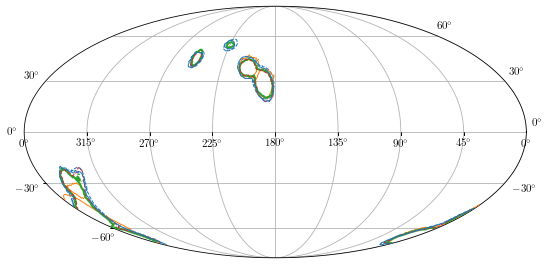

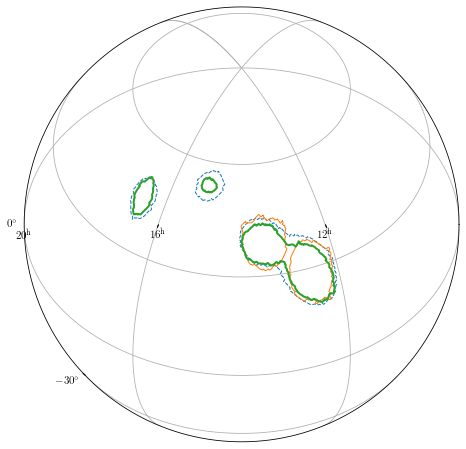

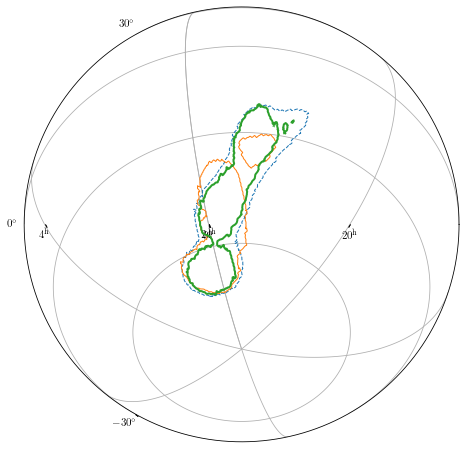

In [22]:
###############################################################
# Fig-5: GW190521 skymaps
##############################################################

import itertools
import healpy as hp
from astropy.coordinates import SkyCoord

# The astropy contour computations issue warnings that can be ignored:
import warnings
warnings.simplefilter('ignore', category=RuntimeWarning)

# LIGO-specific stuff from # https://pypi.org/project/ligo.skymap/
from ligo.skymap.io import fits
from ligo.skymap import plot
from ligo.skymap import postprocess

#####################
def plot_skymap(outfile, center, skymaps, printArea=False):
    

    if (center == None):
        fig = plt.figure(figsize=(9, 6))
        ax = fig.add_subplot(111, projection='astro degrees mollweide')
    else:
        fig = plt.figure(figsize=(8,8))
        ax = plt.axes(projection='astro globe',center=SkyCoord(center))
    ax.grid()
    font = {'family' : 'monospace','weight' : 'bold','size'   : 9}
    plt.rc('font', **font)  # pass in the font dict as kwargs

    # draw skymap 90% CI contours
    contour = [90]
    color_iter = itertools.cycle(['C0', 'C1', 'C2', 'C3'])
    line_styles = itertools.cycle(['--', '-', '-'])
    line_widths = itertools.cycle([1, 1, 2])
    for f, color, style, width in zip(skymaps, color_iter, line_styles, line_widths):
        skymap, metadata = fits.read_sky_map(f, nest=None)
        nside = hp.npix2nside(len(skymap))
        deg2perpix = hp.nside2pixarea(nside, degrees=True)
        # compute credible intervals from skymap
        cls = 100 * postprocess.find_greedy_credible_levels(skymap)

        # print sky area credible intervals
        if (printArea):
            print(f,', gps =',metadata['gps_time'],', gps_creation = ',metadata['gps_creation_time'],
                  ', distmean =',metadata['distmean'],', diststd =',metadata['diststd'])
            ci = 50
            pp = np.round(np.searchsorted(np.sort(cls), ci) * deg2perpix).astype(int)
            print('Sky area at',ci,'% probability =',pp,'sqdg')
            ci = 90
            pp = np.round(np.searchsorted(np.sort(cls), ci) * deg2perpix).astype(int)
            print('Sky area at',ci,'% probability =',pp,'sqdg')
        
        # plot credible interval contours
        cs = ax.contour_hpx((cls, 'ICRS'), nested=metadata['nest'],
            colors=color, linewidths=width, levels=contour, linestyles=style)

    plt.savefig(outfile)

#####################
# The skymap fits files relevant for GW190521 can be downloaded from
# curl https://gracedb.ligo.org/apiweb/superevents/S190521g/files/bayestar.fits.gz,0 -o GW190521_bayestar.fits.gz
# curl https://gracedb.ligo.org/apiweb/superevents/S190521g/files/LALInference.fits.gz,0 -o GW190521_LALInference_initial.fits.gz
# curl https://dcc.ligo.org/DocDB/0169/P2000237/001/GW190521_lalinference_NRSur7dq4_final.fits.gz ./GW190521_lalinference_NRSur7dq4_final.fits.gz
# or get them all from:
# curl https://dcc.ligo.org/public/0166/P2000158/002/GW190521_Implications_figure_data.tar -O | tar xvf -

fitspath = 'GW190521_Implications_figure_data/'
skymaps = [fitspath+'GW190521_bayestar.fits.gz',
           fitspath+'GW190521_LALInference_initial.fits.gz',
           fitspath+'GW190521_NRSur7dq4_skymap.fits.gz',
           fitspath+'GW190521_PhenomPv3HM_skymap.fits.gz',
           fitspath+'GW190521_SEOBNRv4PHM_skymap.fits.gz']

#####################
# generate and save the plots:
plot_skymap(figpath+'GW190521_skymap_figure_moll.pdf', None, skymaps, printArea=True)

# for the implications paper, only plot final map from NRSur, to reduce clutter:
skymaps = [fitspath+'GW190521_bayestar.fits.gz',
           fitspath+'GW190521_LALInference_initial.fits.gz',
           fitspath+'GW190521_NRSur7dq4_skymap.fits.gz']

plot_skymap(figpath+'GW190521_skymap_figure_north.pdf', '14h 44d', skymaps, printArea=False)
plot_skymap(figpath+'GW190521_skymap_figure_south.pdf', '23h -55d', skymaps, printArea=False)
